In [1]:
import fileprocessing
import multianalysis
import matplotlib.pyplot as plt
import cooltools
import cooltools.eigdecomp as eigdecomp
import numpy as np
from importlib import reload
import HMMC
import coolplots
import badtools
import numutils
from multiprocessing import Pool
import matplotlib.gridspec as gridspec
import itertools

In [2]:
cooldir = '/pollard/data/chromatin_organization/rao2014/distiller-0.3.1_hg19/results'

In [3]:
cools = fileprocessing.get_files(cooldir)

In [4]:
df = fileprocessing.cools_df(cools, resolution = 100000)

In [5]:
df

cell_line assembly                                               path  \
0      NHEK     hg19  /pollard/data/chromatin_organization/rao2014/d...   
1     IMR90     hg19  /pollard/data/chromatin_organization/rao2014/d...   
2      K562     hg19  /pollard/data/chromatin_organization/rao2014/d...   
3     HUVEC     hg19  /pollard/data/chromatin_organization/rao2014/d...   
4      HMEC     hg19  /pollard/data/chromatin_organization/rao2014/d...   
5      KBM7     hg19  /pollard/data/chromatin_organization/rao2014/d...   
6   GM12878     hg19  /pollard/data/chromatin_organization/rao2014/d...   

                                              cooler  
0  <Cooler "NHEK_inSitu_MboI.hg19.mapq_30.1000.mc...  
1  <Cooler "IMR90_inSitu_MboI.hg19.mapq_30.1000.m...  
2  <Cooler "K562_inSitu_MboI.hg19.mapq_30.1000.mc...  
3  <Cooler "HUVEC_inSitu_MboI.hg19.mapq_30.1000.m...  
4  <Cooler "HMEC_inSitu_MboI.hg19.mapq_30.1000.mc...  
5  <Cooler "KBM7_inSitu_MboI.hg19.mapq_30.1000.mc...  
6  <Cooler "GM12878_inSitu_MboI.hg19.mapq_30.1000...

In [6]:
genecov_dict = fileprocessing.get_genecov(df)

In [7]:
vals, tracks = multianalysis.get_eigs(df, genecov_dict, n = 3)

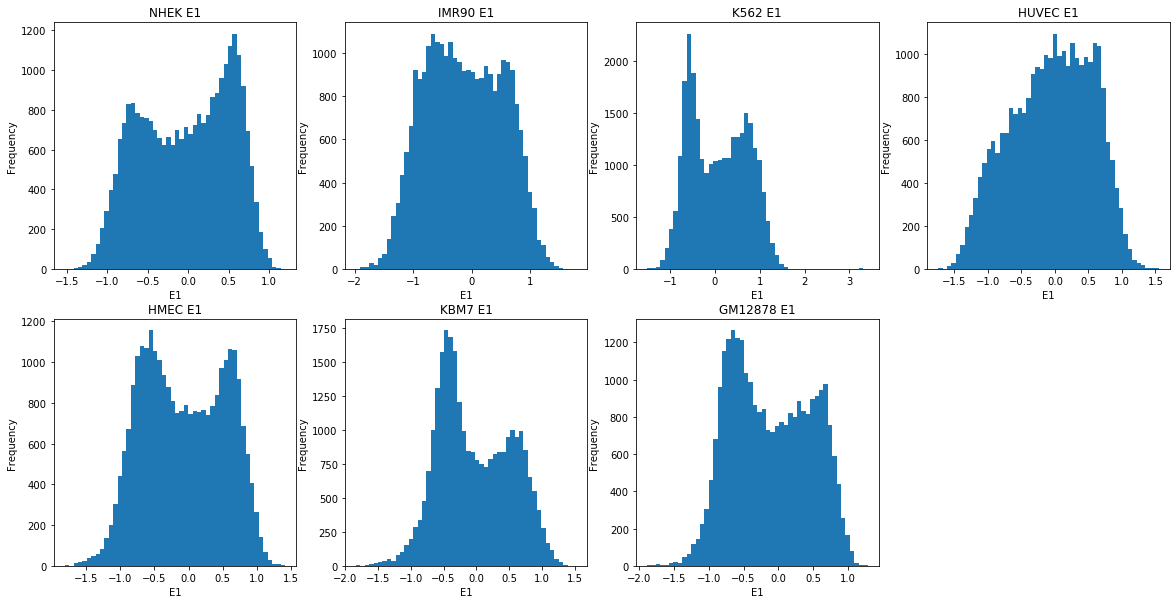

In [8]:
plt.figure(figsize = (20, 10))
for i in range(len(df)):
    plt.subplot(2, 4, i+1)
    plt.hist(tracks[i].E1[ tracks[i].E1 == tracks[i].E1].values, bins = 50)
    plt.title(df.iloc[i].cell_line + ' E1')
    plt.xlabel('E1')
    plt.ylabel('Frequency');

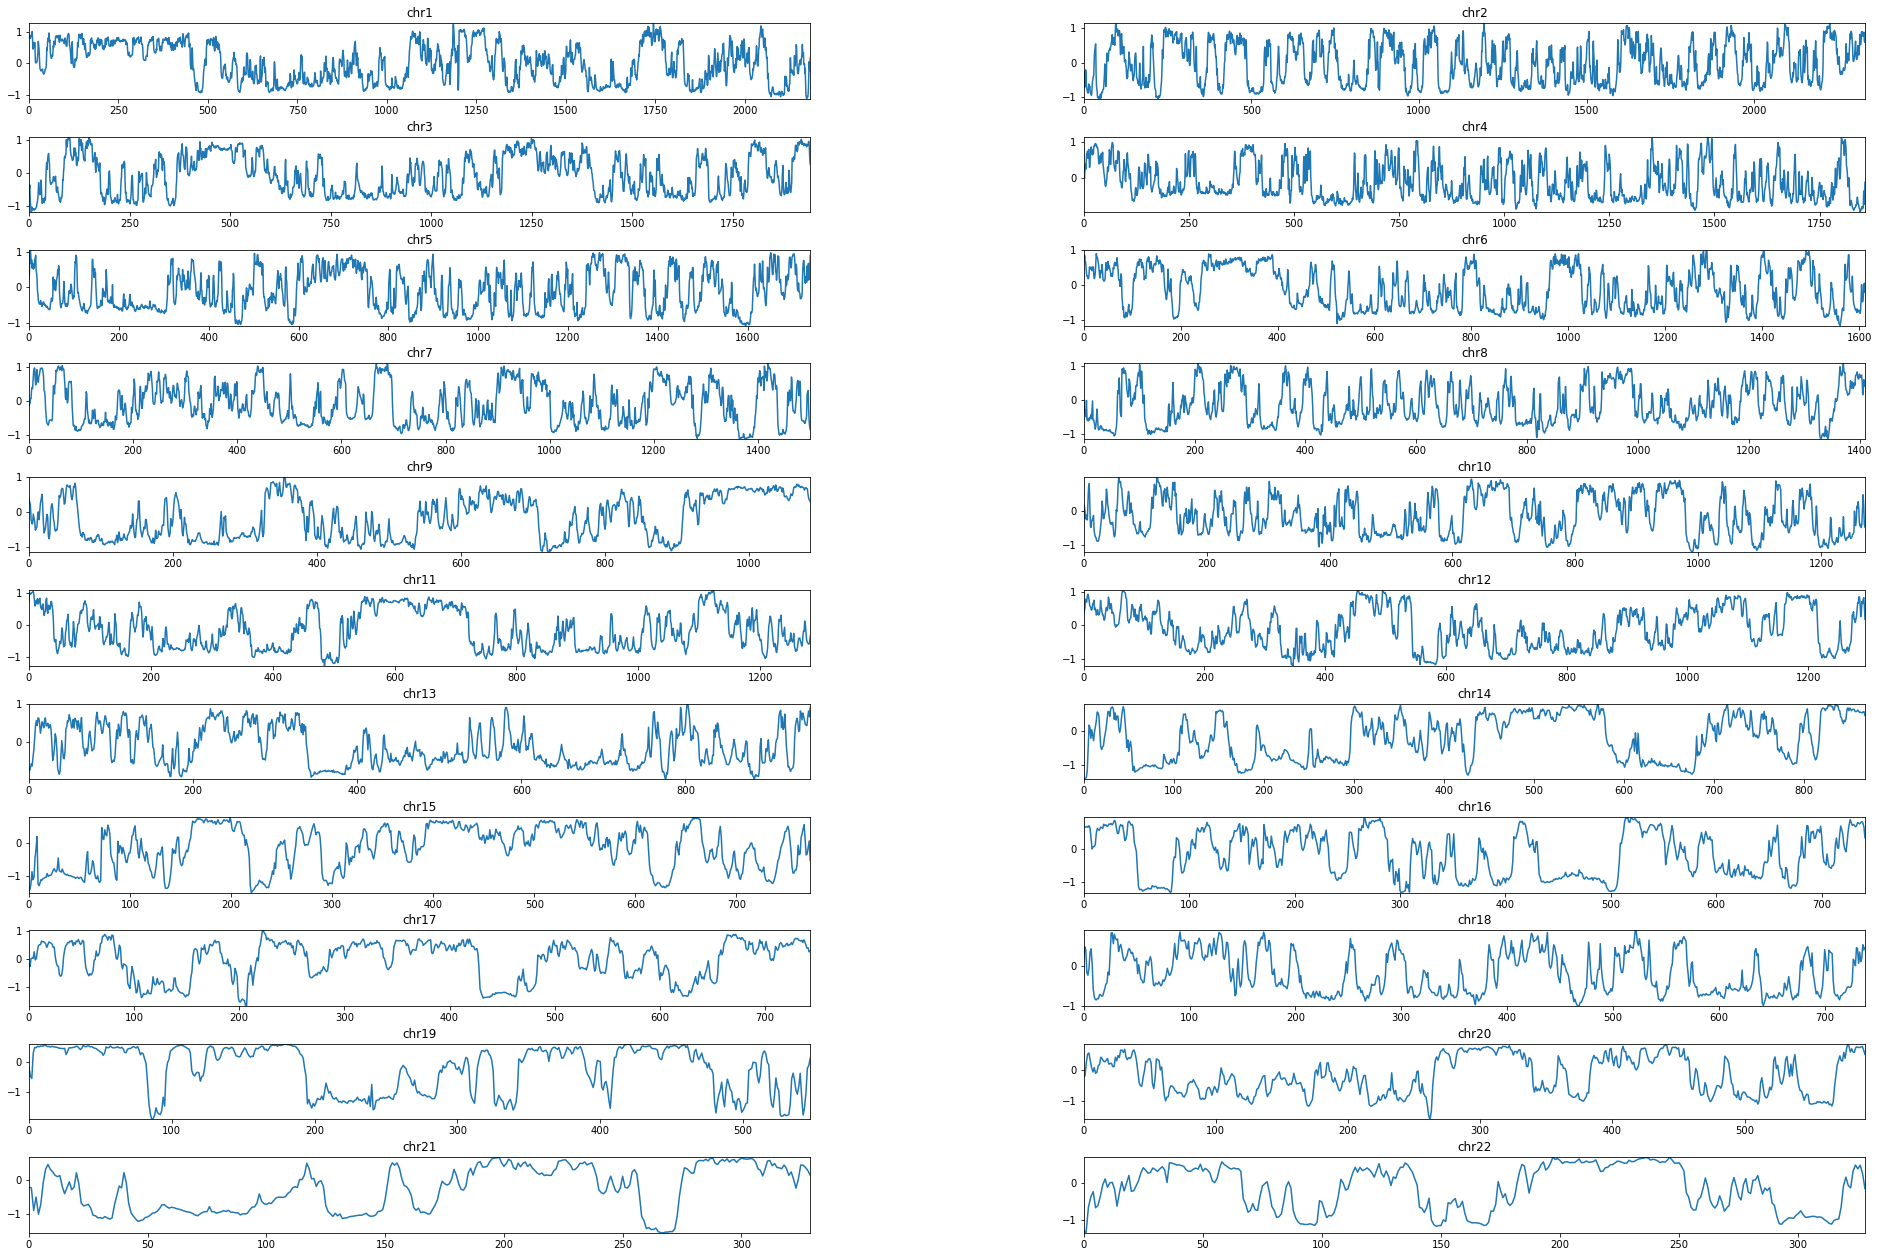

In [9]:
coolplots.plot_chroms(tracks[6], 'E1')

In [10]:
resdict = multianalysis.multi_analyze(df, tracks)

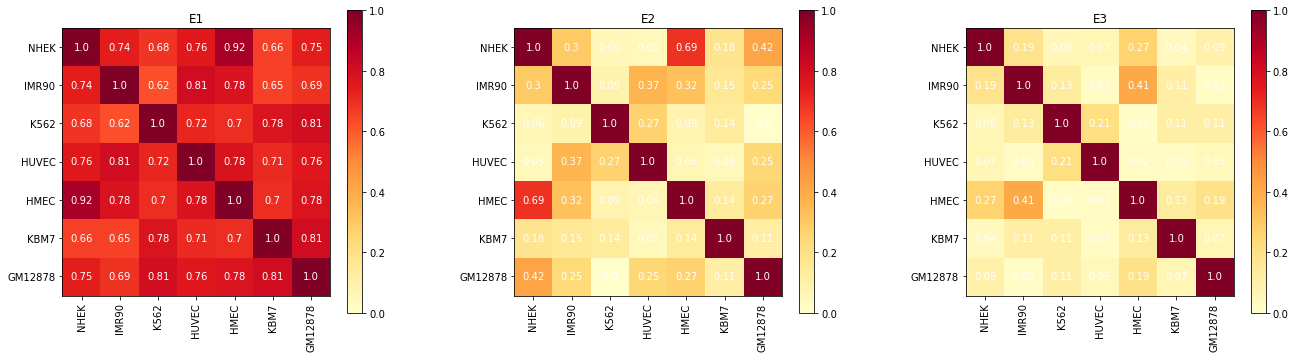

In [11]:
multianalysis.get_correlations(resdict, w= 35, l = 5)

In [12]:
chroms = tracks[0].chrom.unique()[:-2]

In [13]:
'''
multianalysis.get_chrom_correlations(resdict, chroms)
'''


'\nmultianalysis.get_chrom_correlations(resdict, chroms)\n'

In [14]:
reload(HMMC)

<module 'HMMC' from '/pollard/home/lchumpitaz/Hi-C/testing/HMMC.py'>

In [16]:
with Pool(processes=len(tracks)) as pool:
    hmm_tracks = pool.map(HMMC.auto_analyze, tracks)

[ 2. -2.  2. ...  2.  0.  0.]
[ 0.  2.  0. ... -2.  3.  0.]
[ 2. -2.  0. ...  2.  0.  0.]
[ 0.  2. -2. ...  2. -2.  0.]
[ 2. -2.  2. ...  2. -2.  0.]
[ 0.  2. -2. ... -2.  0.  0.]
[ 2. -2.  2. ...  0.  2.  0.]


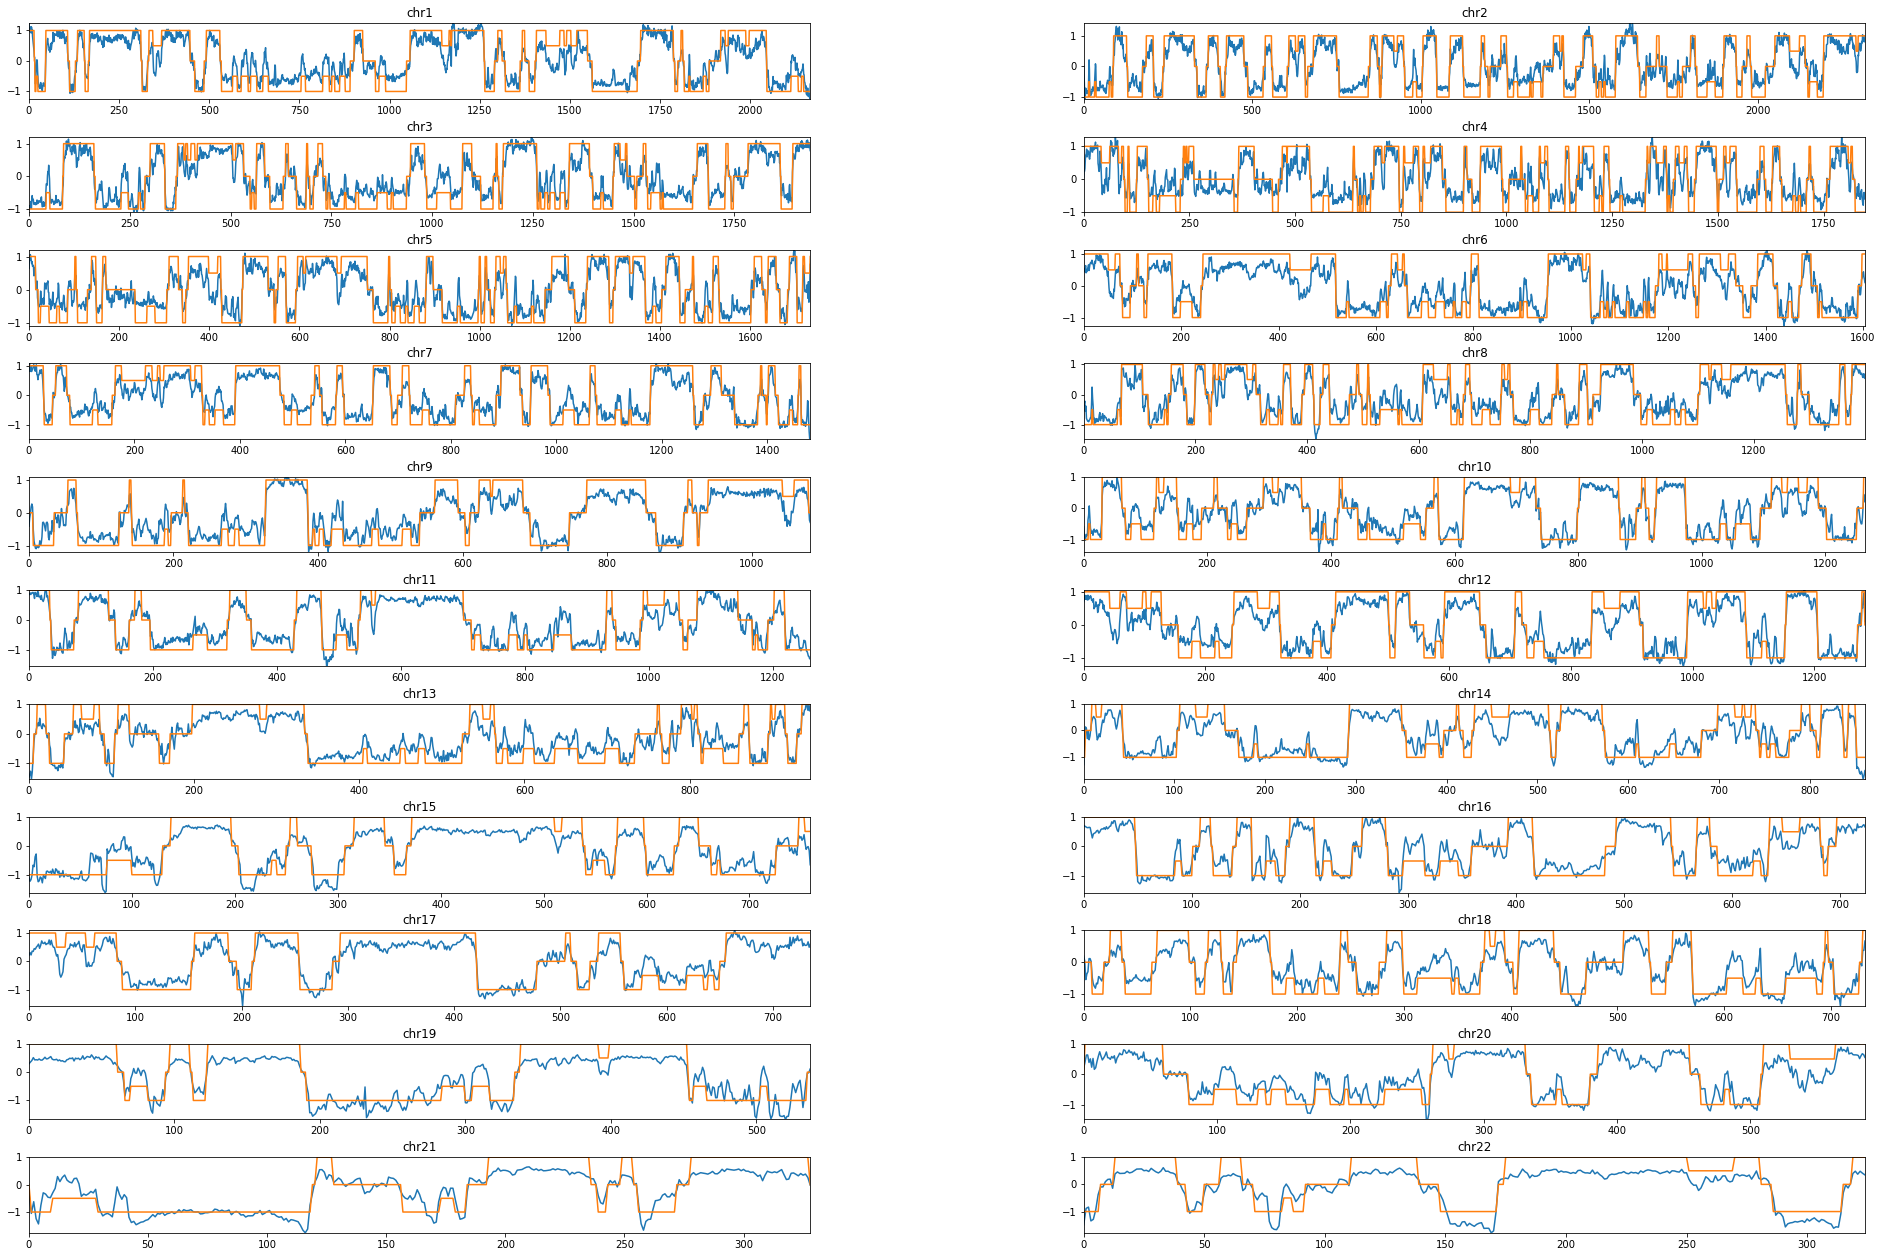

In [18]:
coolplots.plot_chroms(hmm_tracks[4], 'E1','HMM5_2')

In [19]:
resdict = multianalysis.multi_analyze(df, hmm_tracks, ['E1', 'binary', 'HMM2', 'HMM3','HMM4'])

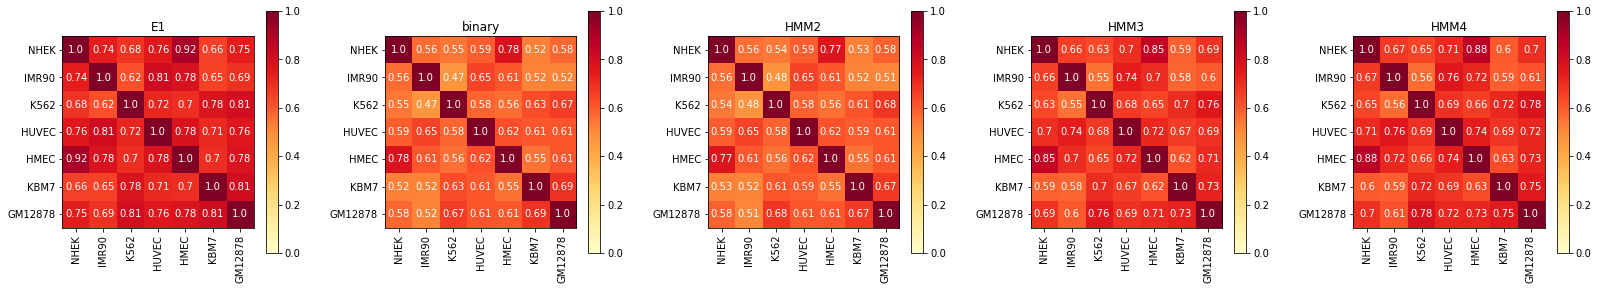

In [20]:
multianalysis.get_correlations(resdict, w= 25, l = 10)

In [21]:
reload(multianalysis)

<module 'multianalysis' from '/pollard/home/lchumpitaz/Hi-C/testing/multianalysis.py'>

In [23]:
#multianalysis.get_chrom_correlations(resdict, chroms)

In [24]:
reload(coolplots)

<module 'coolplots' from '/pollard/home/lchumpitaz/Hi-C/testing/coolplots.py'>

/pollard/home/lchumpitaz/Hi-C/testing/coolplots.py:57: RuntimeWarning: invalid value encountered in greater
  plt.fill_between(x, 0, E, where = E>0)
/pollard/home/lchumpitaz/Hi-C/testing/coolplots.py:58: RuntimeWarning: invalid value encountered in less
  plt.fill_between(x, 0, E, where = E<0)


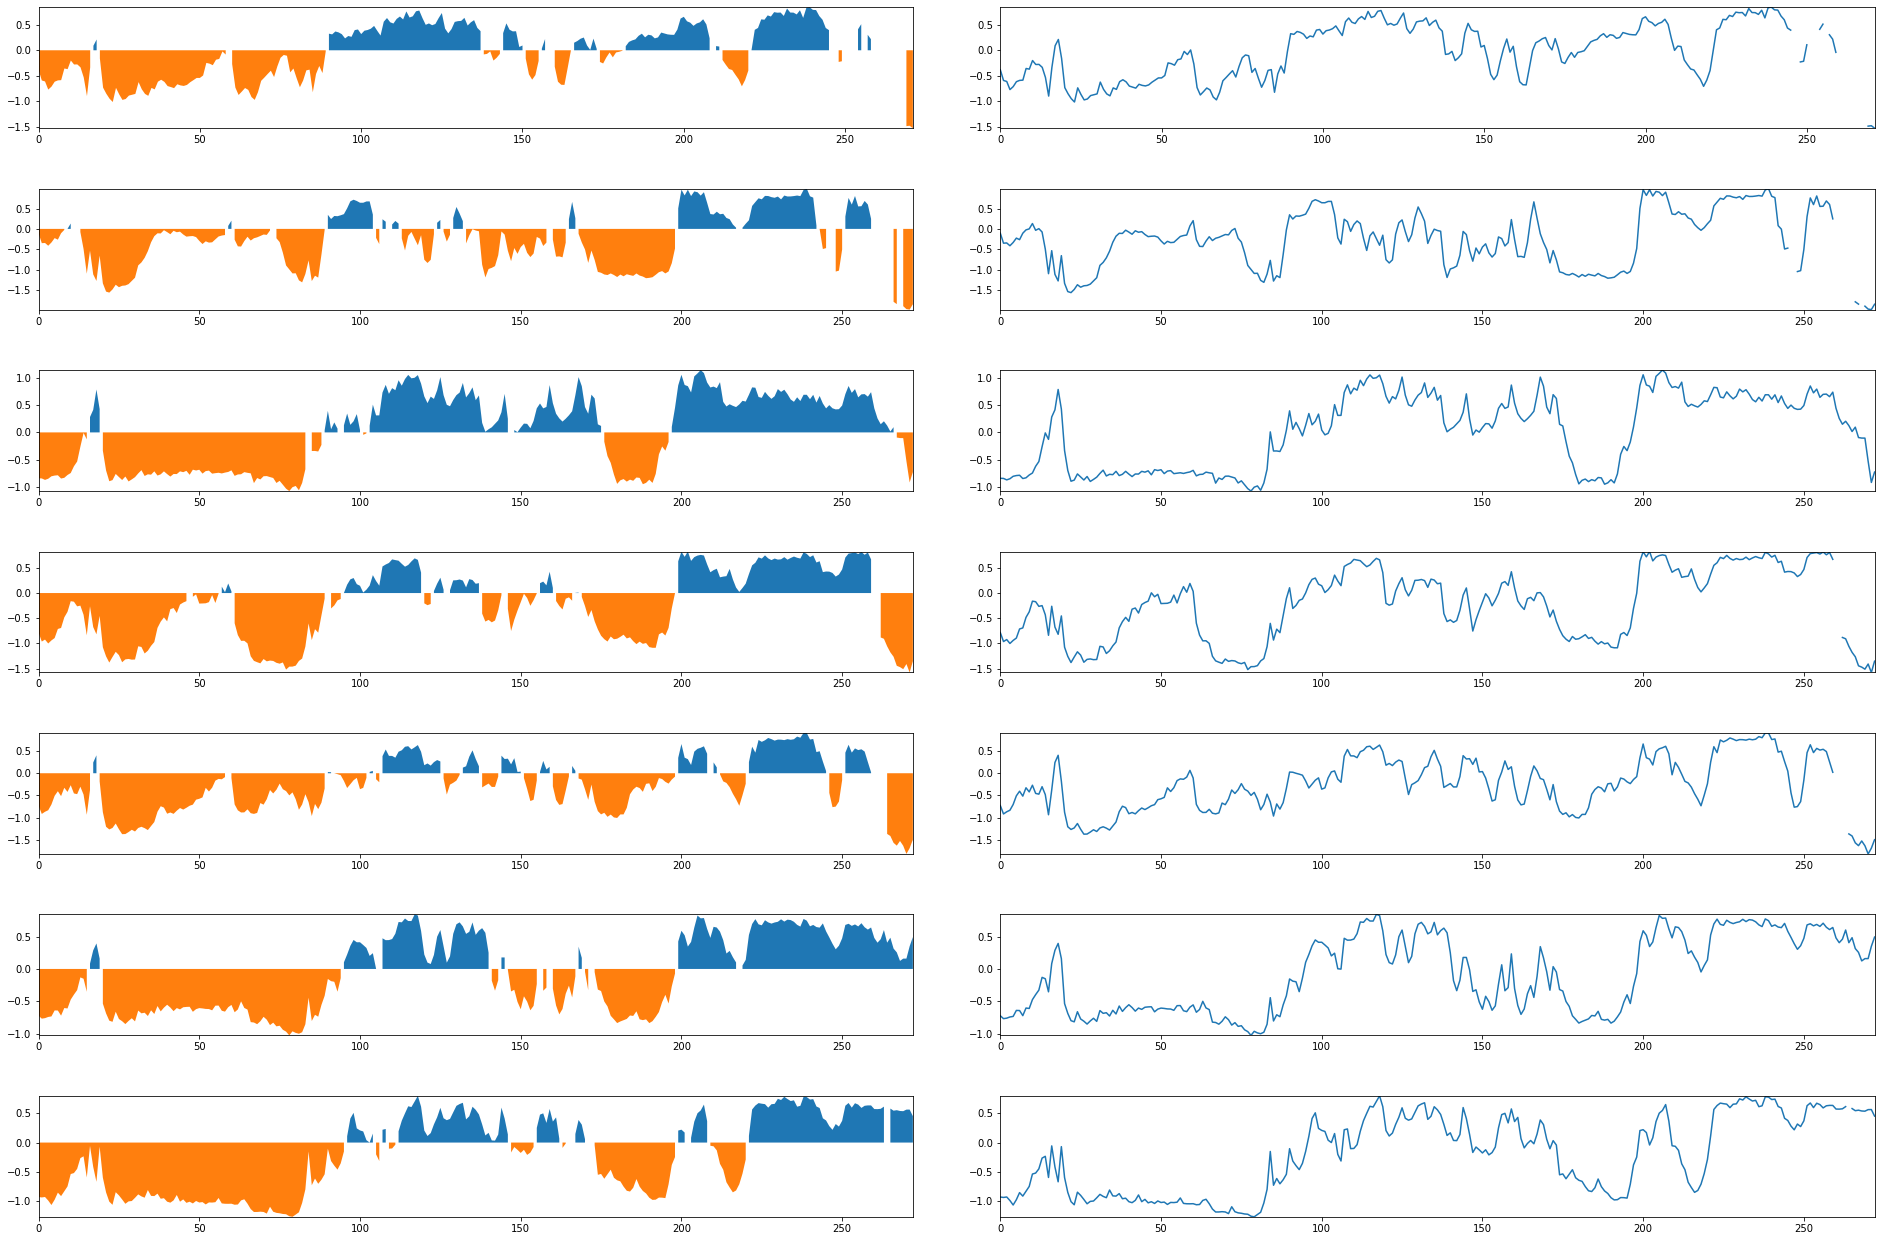

In [25]:
coolplots.compare_chroms(hmm_tracks, 'chr14', 800, -1, 'E1')

In [26]:
start, end = 800, -1
ch = 'chr14'

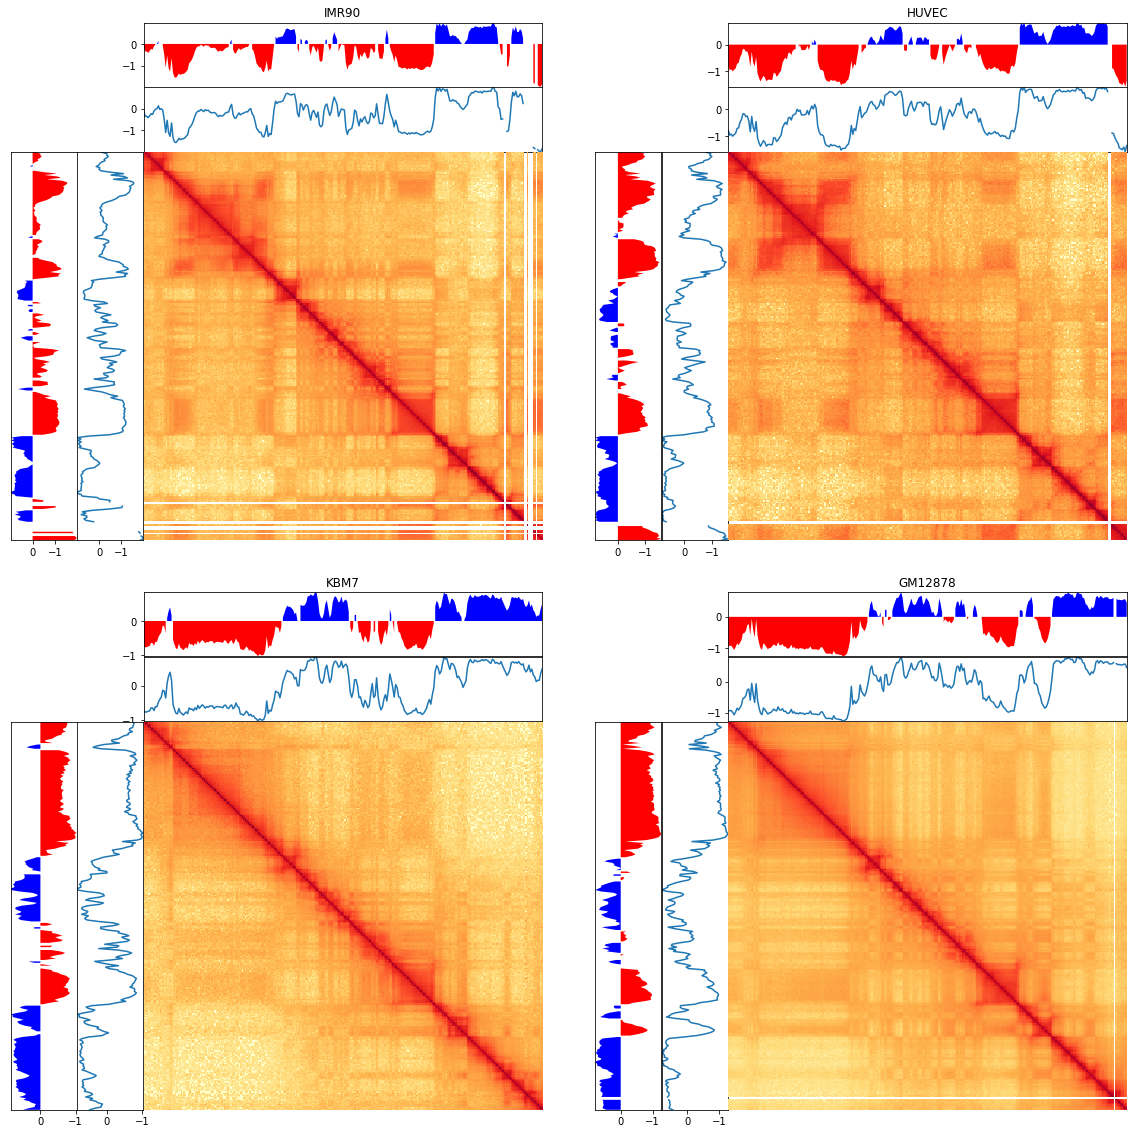

In [27]:
plt.figure(figsize = (20, 20))
t = [1, 3, 5, 6]
outer = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.1)

for i in range(len(t)):
    inner = gridspec.GridSpecFromSubplotSpec(8, 8, subplot_spec=outer[i], wspace=0.01, hspace=0.01)
    
    y = hmm_tracks[t[i]]
    
    y = y[y.chrom == ch].E1
    x = np.linspace(0, len(y)-1, len(y))
    
    

    plt.subplot(inner[0, 2:])
    plt.title(df.cell_line[t[i]])
    
    
   
    plt.fill_between(x[start:end], y[start:end], where= y[start:end] > 0, facecolor='blue')
    plt.fill_between(x[start:end], y[start:end], where= y[start:end] < 0, facecolor='red')

    plt.gca().axes.get_xaxis().set_visible(False)
    plt.margins(0)
    
    
    plt.subplot(inner[1, 2:])
    
    
    plt.plot(x[start:end], y[start:end])
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.margins(0)
    
    
    
    plt.subplot(inner[2:, 0])
    
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.gca().axes.get_yaxis().set_visible(False)
    
    plt.fill_betweenx(x[start:end], y[start:end], where= y[start:end] > 0, facecolor='blue')
    plt.fill_betweenx(x[start:end], y[start:end], where= y[start:end] < 0, facecolor='red')
    plt.margins(0)


    
    
    plt.subplot(inner[2:, 1])
    
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.gca().axes.get_yaxis().set_visible(False)
    
    plt.plot(y[start:end], x[start:end])
    plt.margins(0)
    
    
    
    plt.subplot(inner[2:, 2:])
    arr = df.cooler[t[i]].matrix().fetch(ch)[start:end, start:end]
    plt.imshow(np.log(arr + 1e-5), cmap = 'YlOrRd', aspect='auto')
    plt.axis('off')

    

In [28]:
bed_dir = '/pollard/data/functional_genomics/encode'

In [29]:
beds = fileprocessing.get_files(bed_dir, 'bed.gz')

In [30]:
beds_df = fileprocessing.beds_df(beds)
beds_df.head()

cell_line     assay     file_format  \
0  keratinocyte  ChIP-seq  bed narrowPeak   
1  keratinocyte  ChIP-seq  bed narrowPeak   
2  keratinocyte  ChIP-seq  bed narrowPeak   
3  keratinocyte  ChIP-seq  bed narrowPeak   
4  keratinocyte  ChIP-seq  bed narrowPeak   

                             output_type assembly file_status target  \
0          optimal idr thresholded peaks   GRCh38    released   CTCF   
1  peaks and background as input for IDR   GRCh38    released   CTCF   
2  peaks and background as input for IDR   GRCh38    released   CTCF   
3  peaks and background as input for IDR   GRCh38    released   CTCF   
4     conservative idr thresholded peaks     hg19    released   CTCF   

  biosample_treatment                   lab replicate           file_name  \
0                None  Vishwanath Iyer, UTA    rep1,2  ENCFF028IIR.bed.gz   
1                None  Vishwanath Iyer, UTA    rep1,2  ENCFF465MVV.bed.gz   
2                None  Vishwanath Iyer, UTA      rep1  ENCFF301UPP.bed.gz   
3                None  Vishwanath Iyer, UTA      rep2  ENCFF623KYU.bed.gz   
4                None  Vishwanath Iyer, UTA    rep1,2  ENCFF226MQR.bed.gz   

                                       file_location  
0  /pollard/data/functional_genomics/encode/kerat...  
1  /pollard/data/functional_genomics/encode/kerat...  
2  /pollard/data/functional_genomics/encode/kerat...  
3  /pollard/data/functional_genomics/encode/kerat...  
4  /pollard/data/functional_genomics/encode/kerat...

In [ ]:
beds_df[beds_df.output_type == 'optimal idr thresholded peaks'].target

In [31]:
#targets = ['H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K9ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K79me2', 'H4K20me1']

In [32]:
i = 1
df.iloc[i]

cell_line                                                IMR90
assembly                                                  hg19
path         /pollard/data/chromatin_organization/rao2014/d...
cooler       <Cooler "IMR90_inSitu_MboI.hg19.mapq_30.1000.m...
Name: 1, dtype: object

In [63]:
def get_chips(beds_df, cell_line, assembly):
    loc = beds_df[( beds_df.cell_line == cell_line)& 
                  (beds_df.assembly == assembly) &
                  (beds_df.output_type == 'optimal idr thresholded peaks') &
                  (beds_df.replicate == 'rep1,2')
                 ]
    loc = loc.reset_index(drop = True)
    return loc

In [437]:
reload(badtools)

<module 'badtools' from '/pollard/home/lchumpitaz/Hi-C/testing/badtools.py'>

In [37]:
def run_process(f, collection):
    
    try:
        with Pool(processes=30) as pool:
            r = pool.starmap(f, collection)
            print('Succesful')
        return r
    except:
        print('Error in collection')
        return [None]

In [36]:
df.cell_line.unique()

array(['NHEK', 'IMR90', 'K562', 'HUVEC', 'HMEC', 'KBM7', 'GM12878'],
      dtype=object)

In [64]:
i = 0
loc = get_chips(beds_df, df.iloc[i].cell_line, df.iloc[i].assembly)


In [65]:
results = [run_process(badtools.chip_intersect, zip(itertools.repeat(hmm_tracks[i]), get_chips(beds_df, df.iloc[i].cell_line, df.iloc[i].assembly).file_location.values.tolist()))
           for  i in range(len(df))]

Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful


In [72]:
for i in range(len(results)):
    print(i , len(results[i]), df.cell_line[i])

0 0 NHEK
1 8 IMR90
2 316 K562
3 4 HUVEC
4 0 HMEC
5 0 KBM7
6 121 GM12878


In [74]:
def mask_signal(df, sig_target, sig_rule):
    '''
        df: pandas dataframe
        sig_target: column name of which desired signal is to be masked
        sig_rule: column name of the signal that is set to be used as the masking rule
    '''
    mask = df[sig_rule] == df[sig_rule]
    
    return df[mask][sig_target].values

In [75]:
def get_window(indexes, signal, window = 5):
    '''
        indexes: list of indexes
        signal: np.array of signal to be windowed
        window: int of size of window
    '''
    #mask = np.where( np.diff(indexes)> 2*window+1)[0]
    
    #mask = np.append(0, mask)
    
    
    return np.array([signal[index-window:index+window+1] for index in indexes])
    

In [215]:
k = 6
x = mask_signal(hmm_tracks[k], 'HMM3', 'E1')
h = np.array([2, 1, 0])
conv_list1, index_list1 = find_pattern(x, h, 50)
conv_list2, index_list2 = find_pattern(x, h[::-1], 50)

In [216]:
windows = stack_windows(index_list, mask_signal(hmm_tracks[k], 'E1', 'E1'), window = 14)

In [187]:
all_windows = list()
for k in range(len(df)):
    loc = get_chips(beds_df, df.iloc[k].cell_line, df.iloc[k].assembly)
    x = mask_signal(hmm_tracks[k], 'HMM3', 'E1')
    h = np.array([2, 1, 0])
    conv_list, index_list = find_pattern(x, h, 50)
    
    
    flat_windows= list()
    for i in range(len(loc)):
        windows = stack_windows(index_list, mask_signal(results[k][i], 'signalValue', 'E1'), window = 14)
        mask = windows > np.percentile(windows, 25)
        median = np.median(windows[mask])
        
        winenrich = np.clip(windows/median, 0, 2)
        
        flat_windows.append((winenrich.T).reshape(-1))
        '''
        plt.figure(figsize = (50, 3))
        plt.imshow(windows.T/median, vmin = 0, vmax = 2, cmap = 'bwr', extent = [ 0, windows.shape[0], -14, 14])
        plt.colorbar()
        plt.title(loc.cell_line[i] + " "+ loc.target[i]);
        '''
        #plt.savefig('plots/' + loc.cell_line[i]+'_' + loc.target[i])
        #plt.close()
    all_windows.append(flat_windows)

In [190]:
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import KMeans

X_embedded = TSNE(n_components=2).fit_transform(np.array(all_windows[2]))
kmeans = KMeans(n_clusters=6, random_state=40).fit_predict(X_embedded)

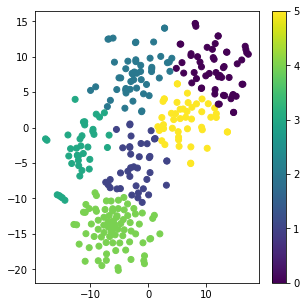

In [219]:
plt.figure(figsize = (5, 5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = kmeans)
plt.colorbar()

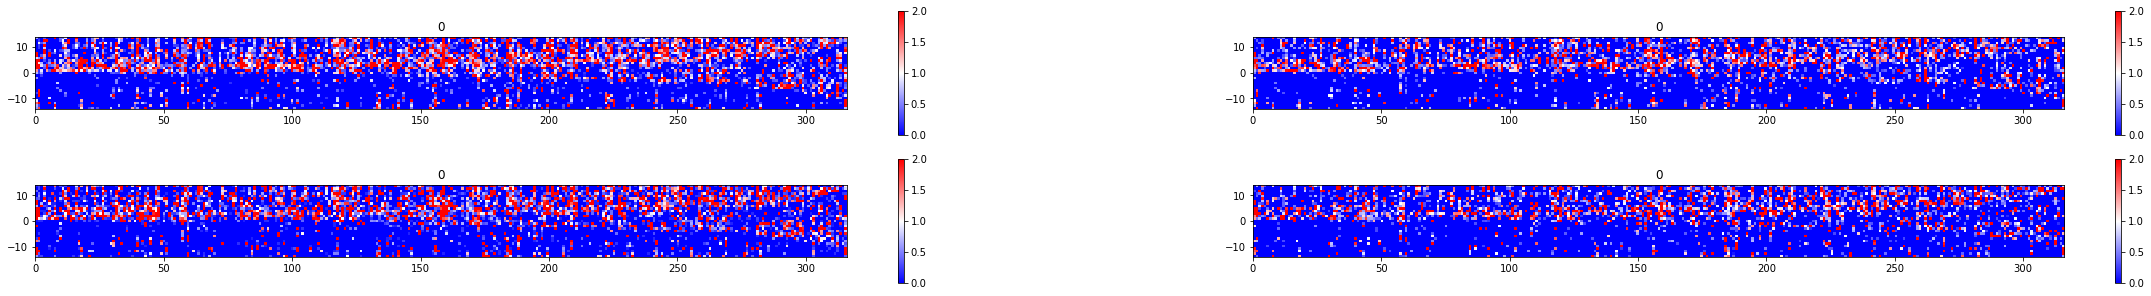

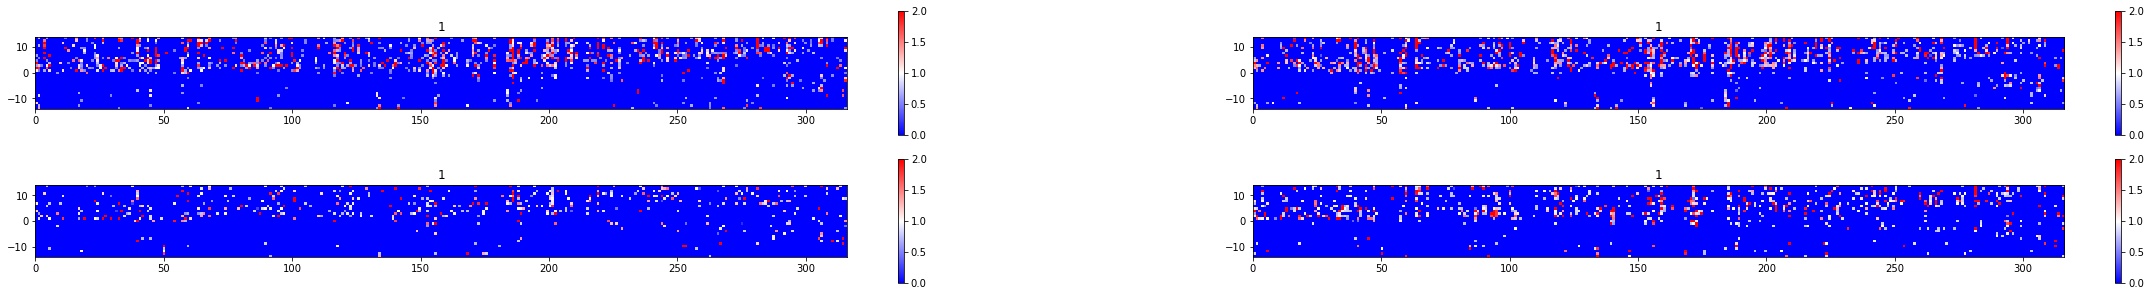

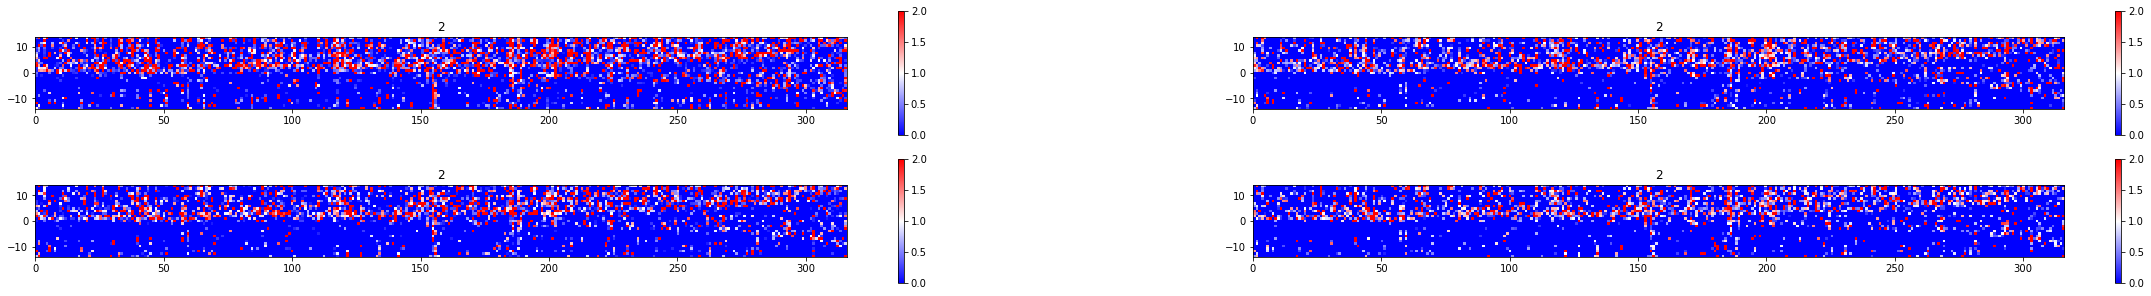

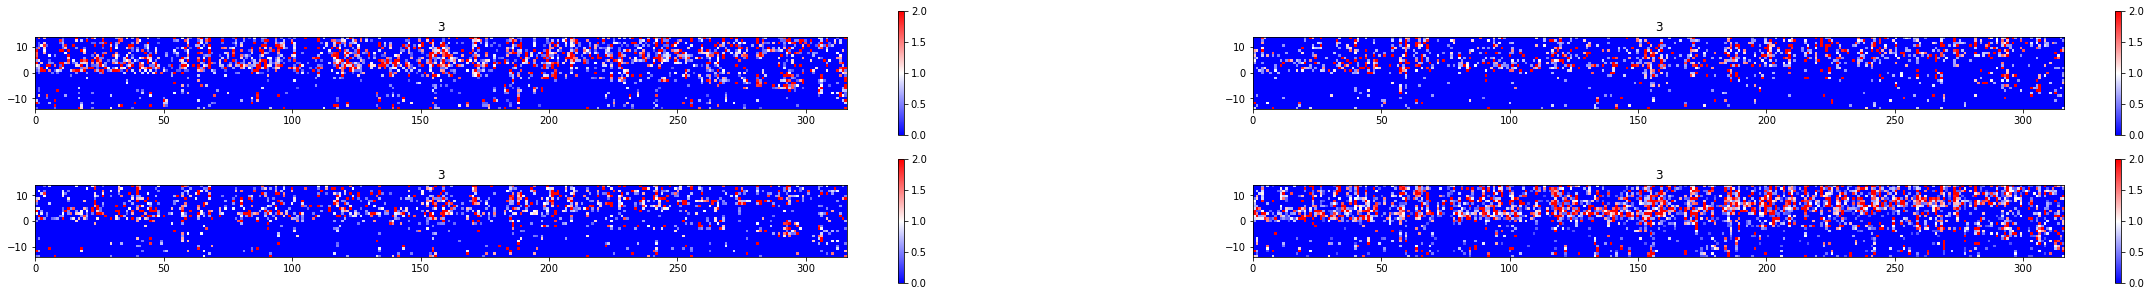

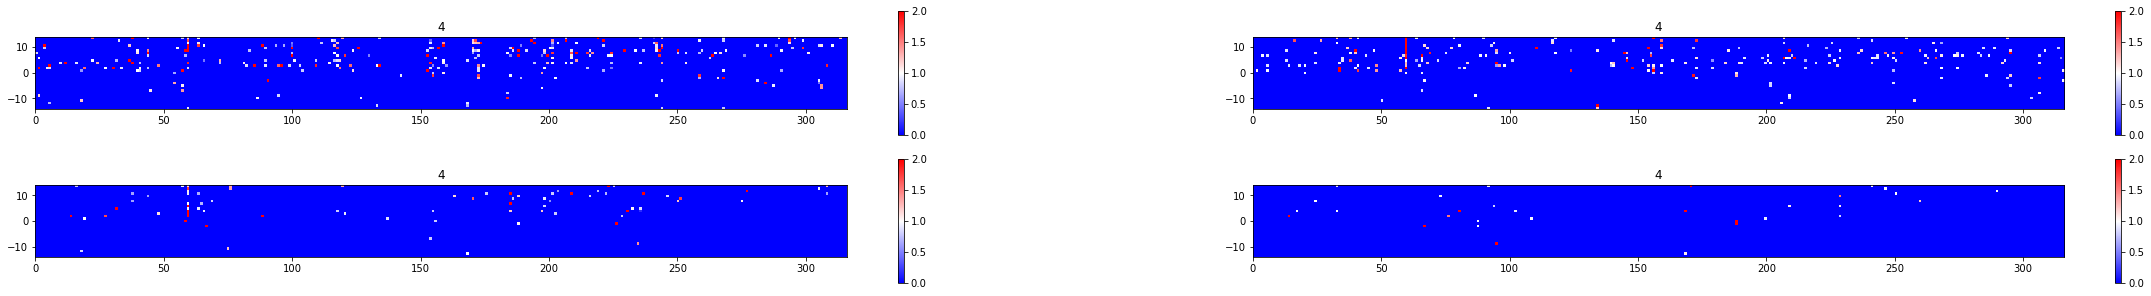

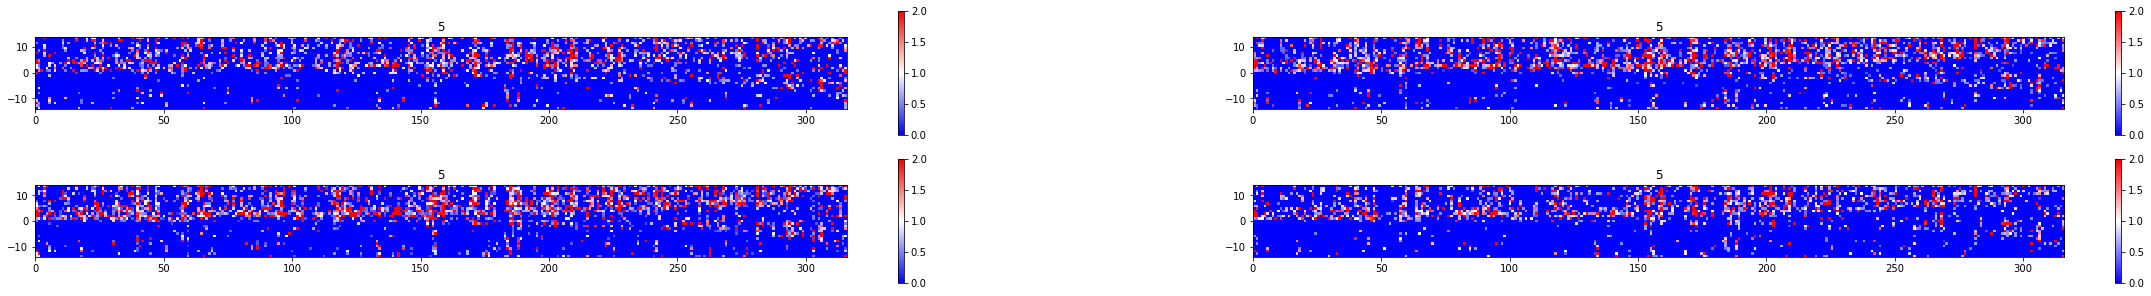

In [230]:
for i in range(6):
    some_wins = np.array(all_windows[2])[kmeans == i]
    plt.figure(figsize = (40, 5))
    for j in range(4):
        plt.subplot(2, 2, j+1)
        plt.imshow(some_wins[j].reshape(29, -1), vmin = 0, vmax = 2, cmap = 'bwr', extent = [ 0, windows.shape[0], -14, 14])
        plt.colorbar()
        plt.title(i)
        

/pollard/home/lchumpitaz/anaconda2/envs/HC/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


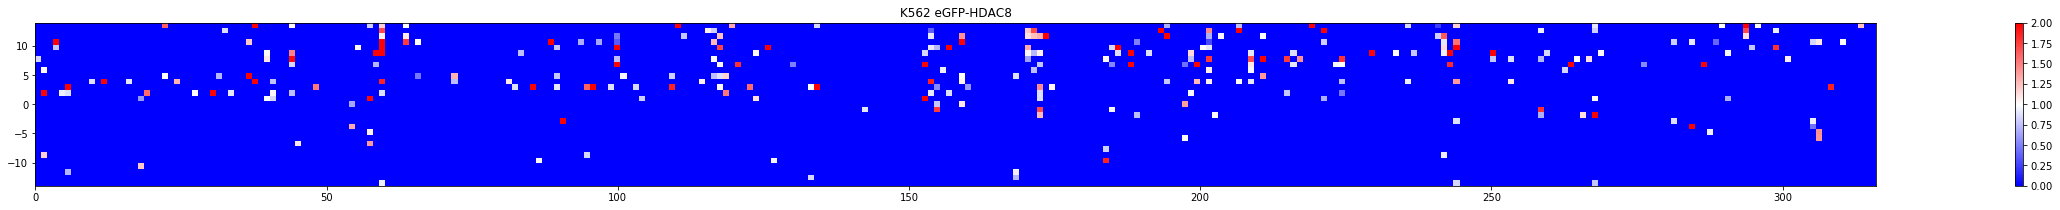

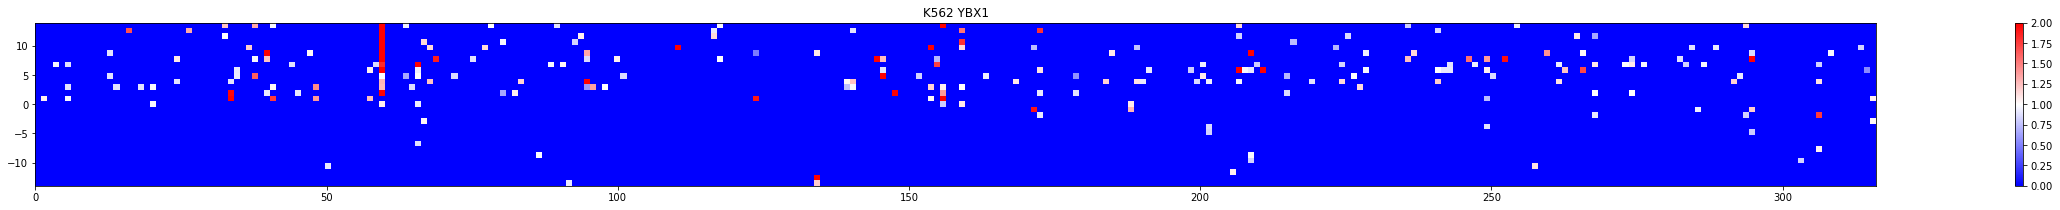

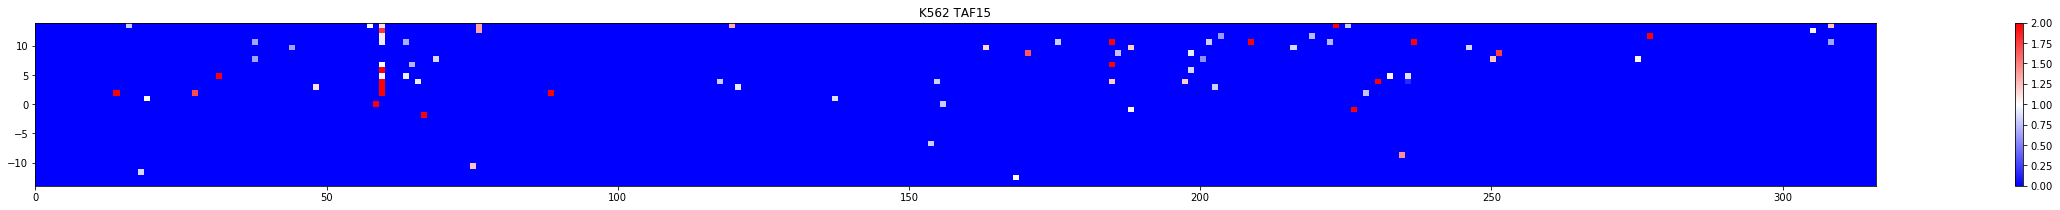

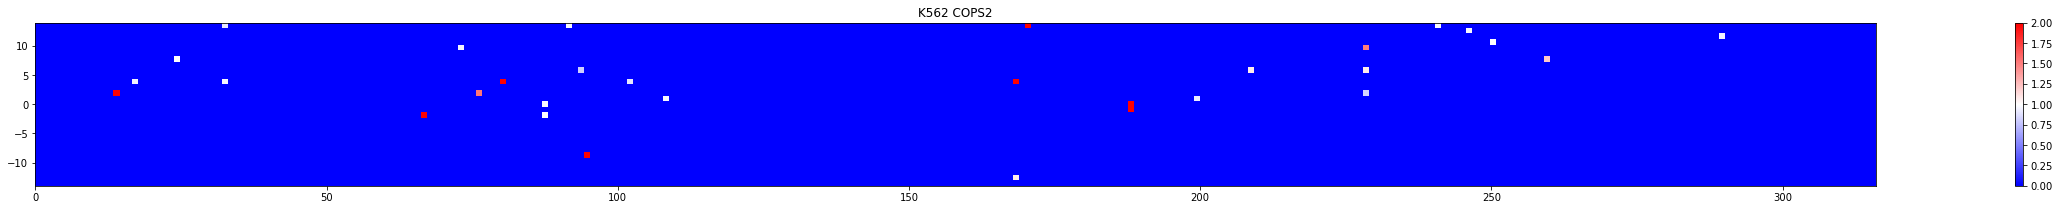

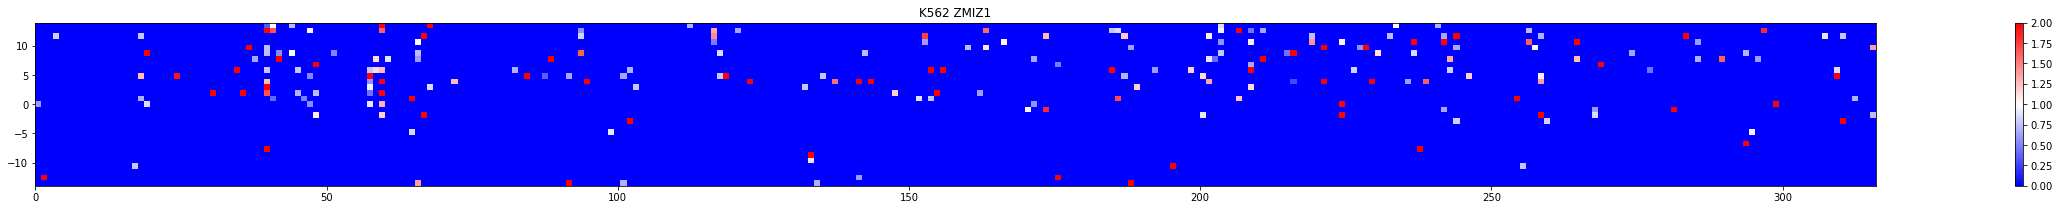

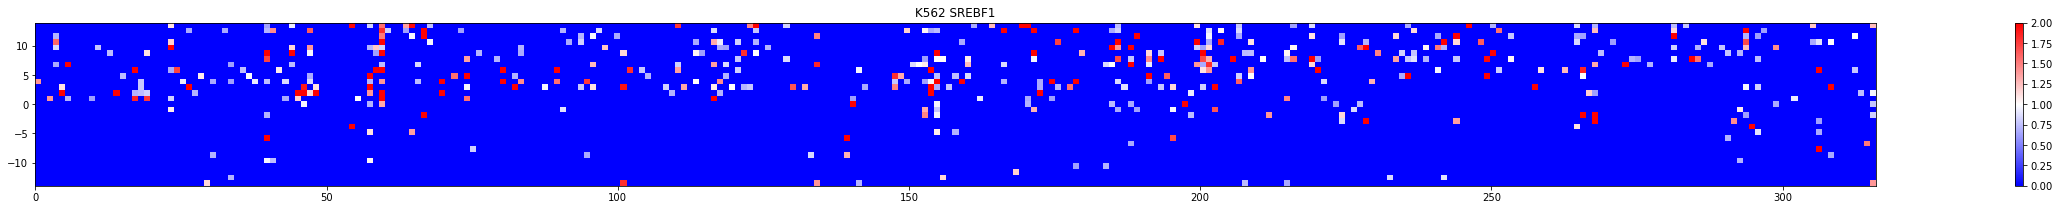

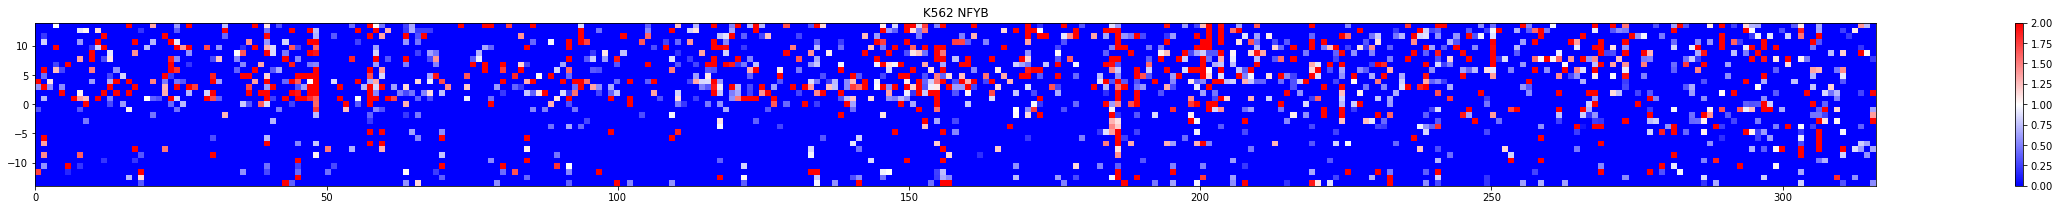

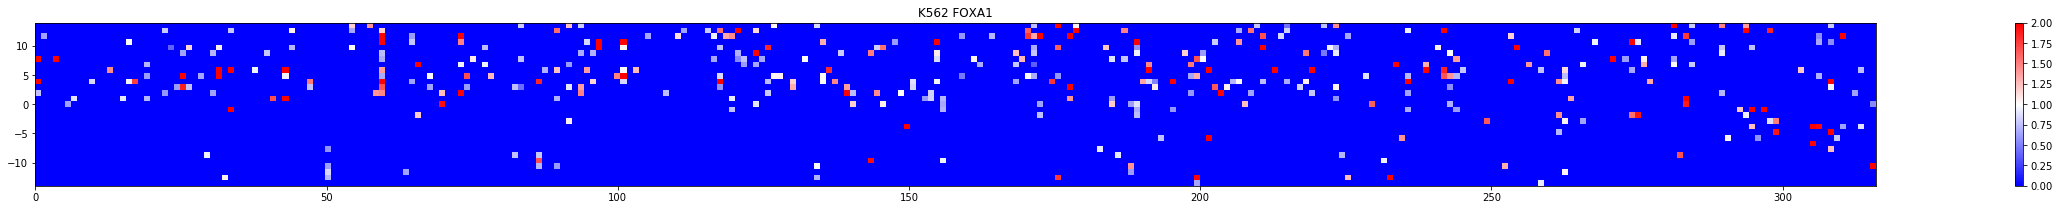

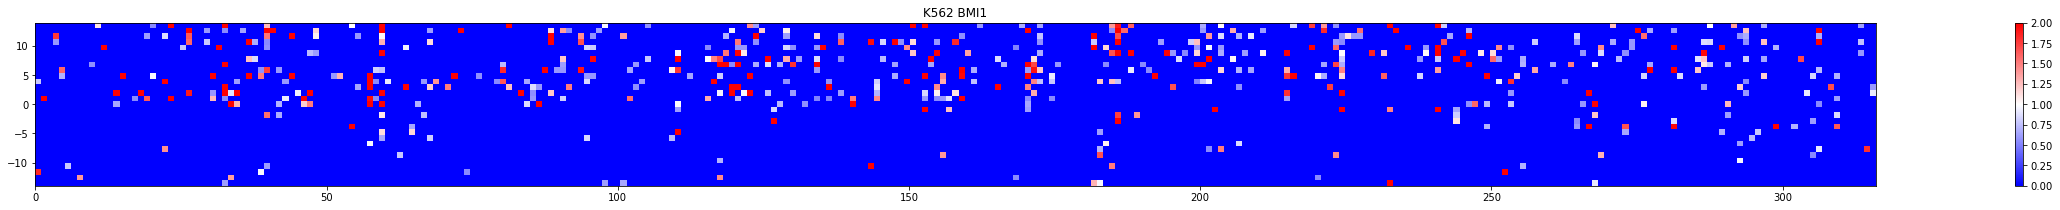

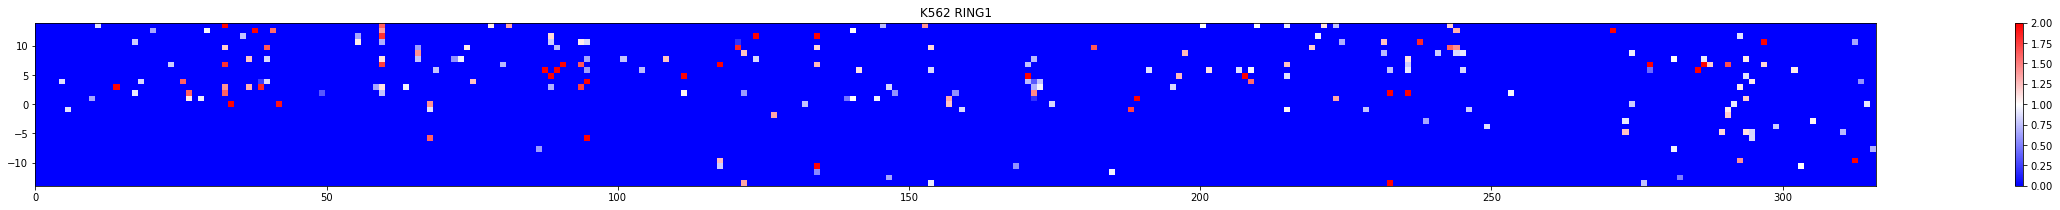

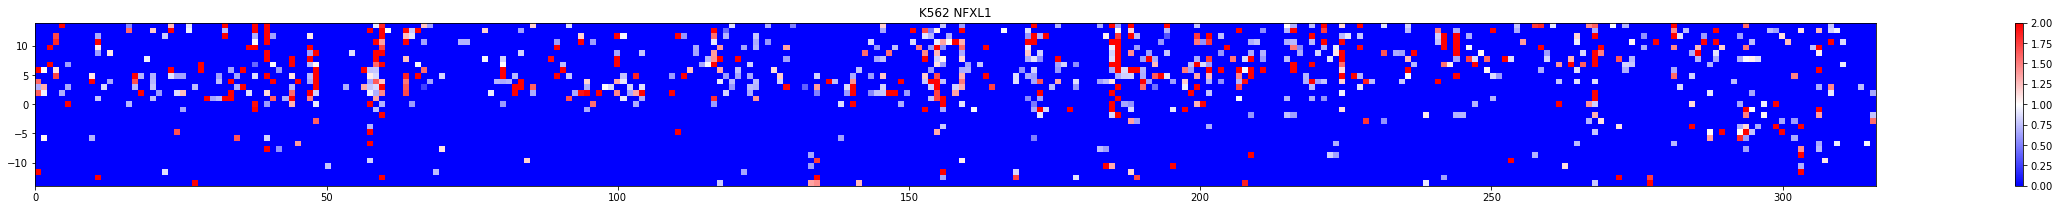

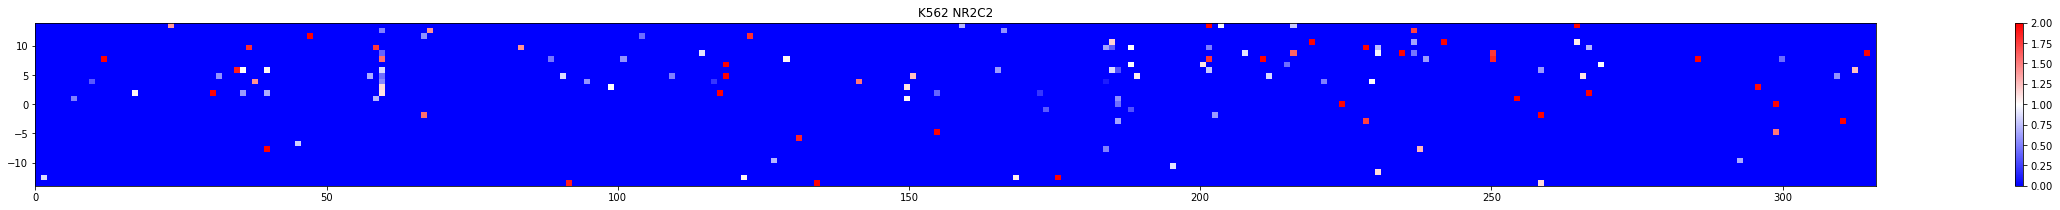

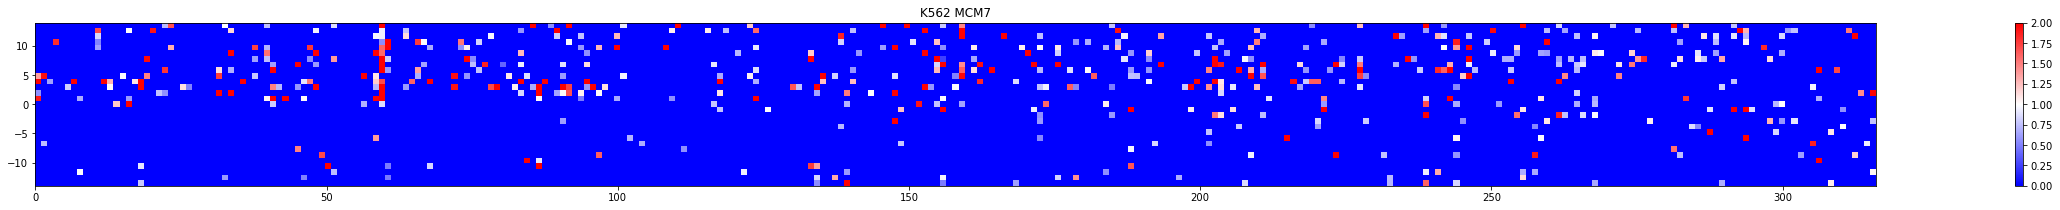

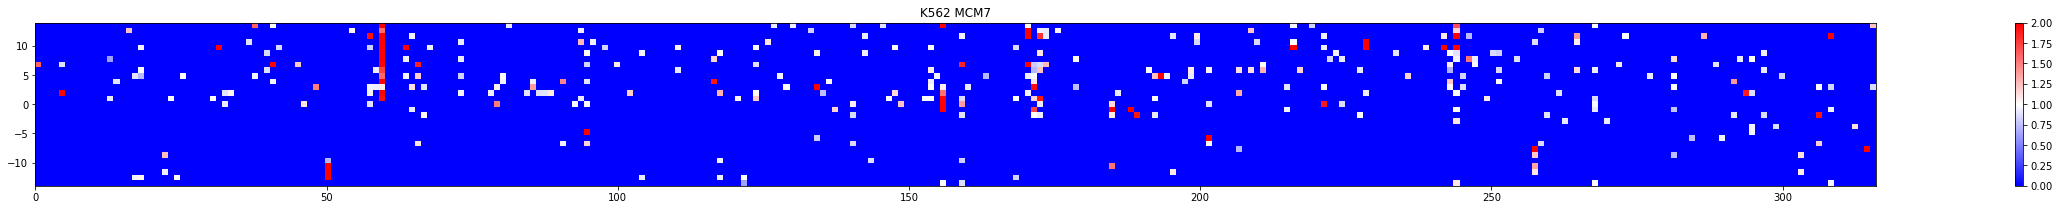

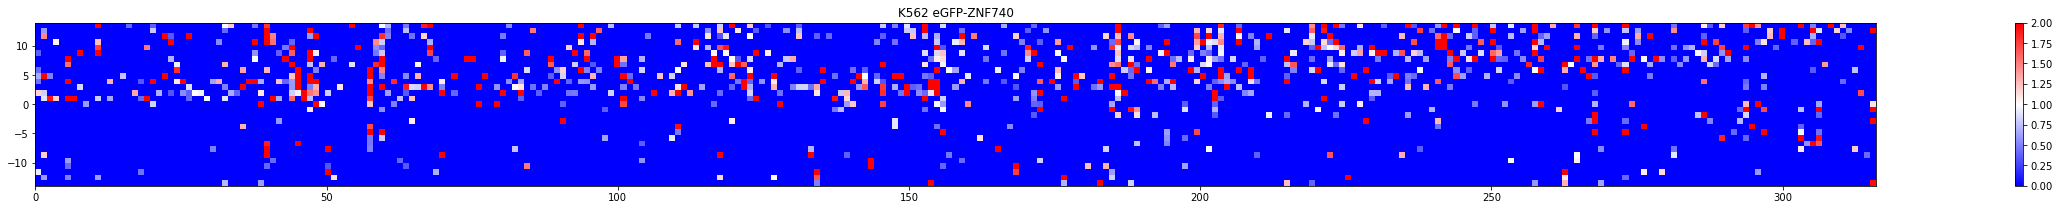

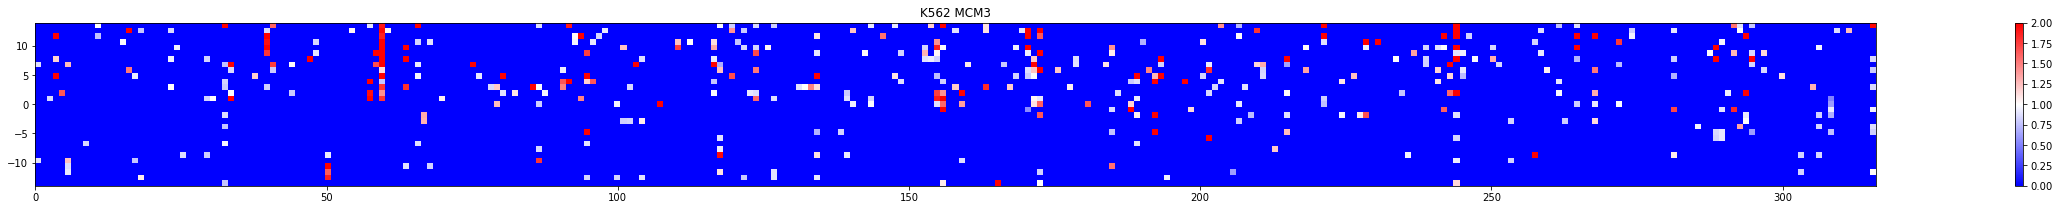

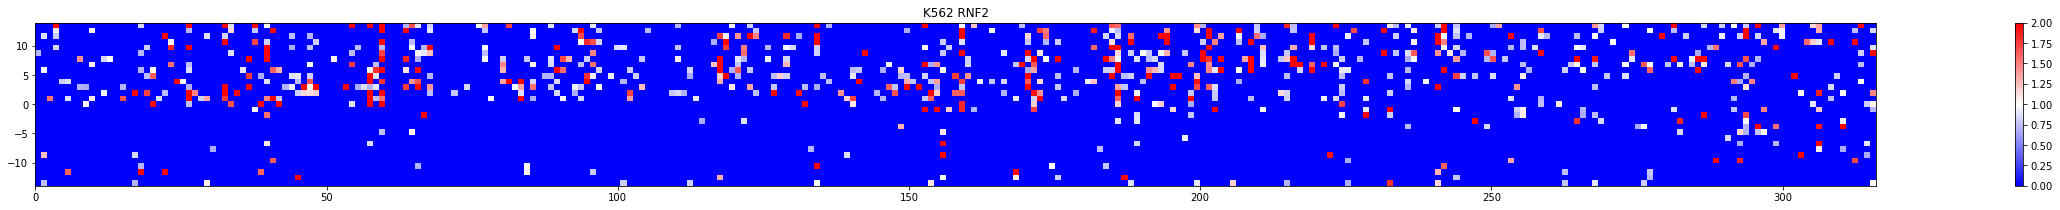

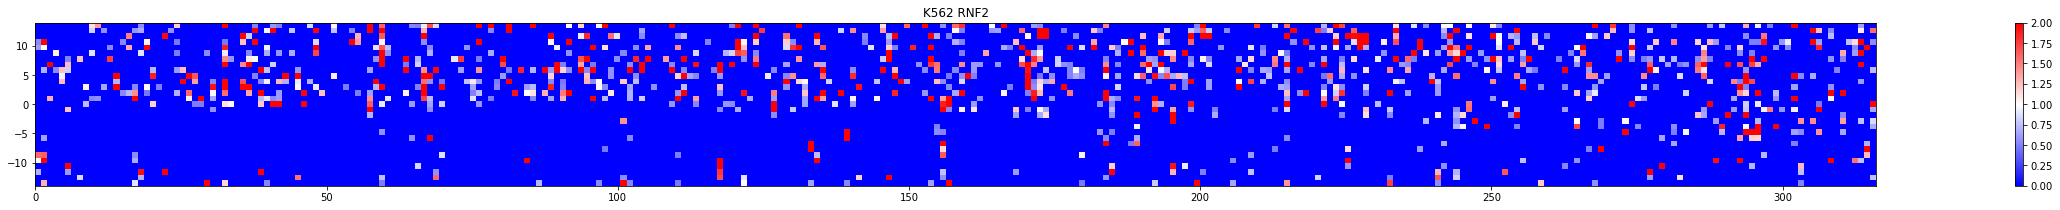

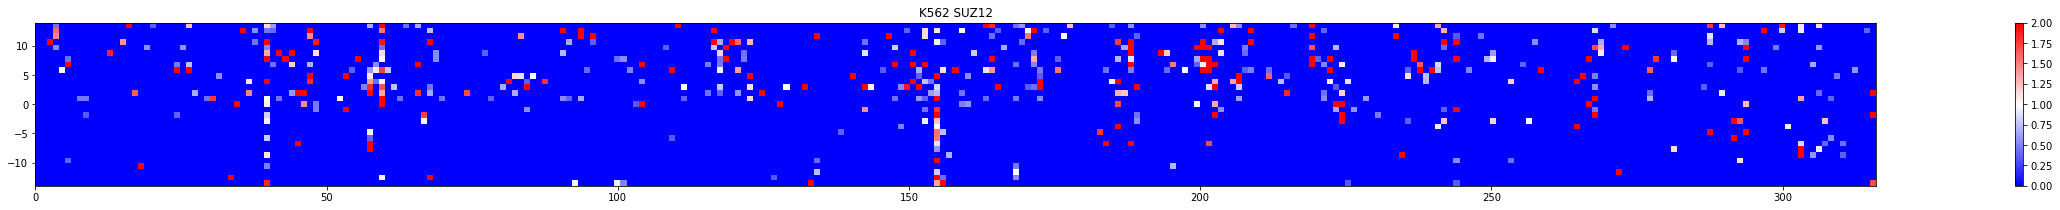

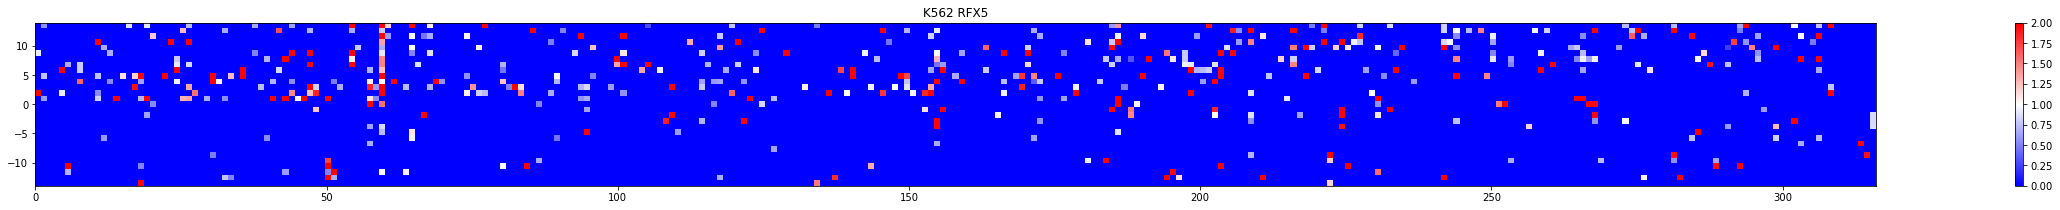

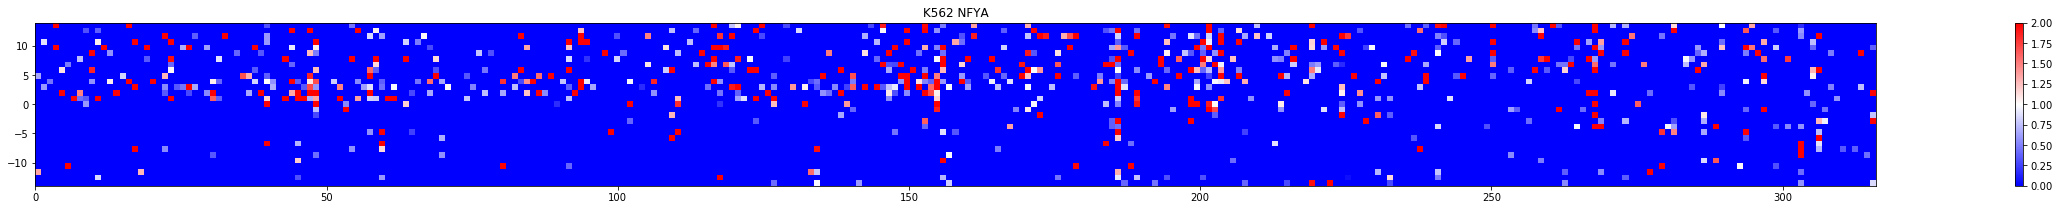

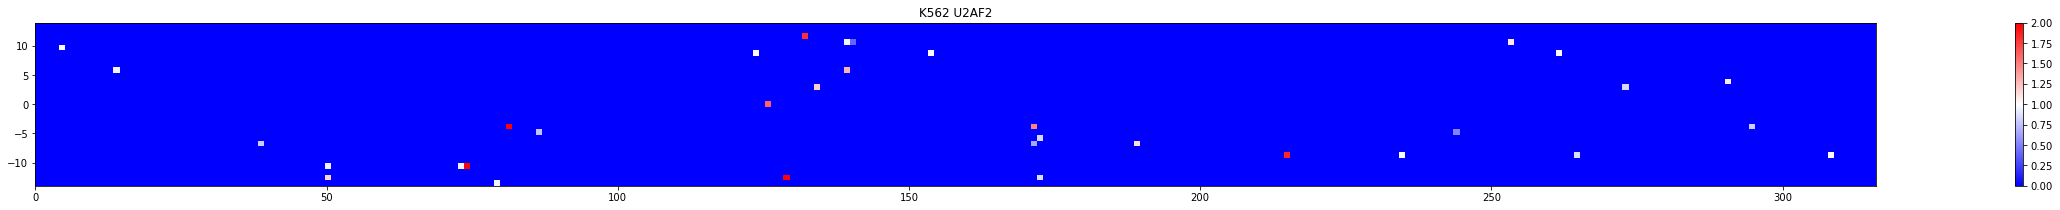

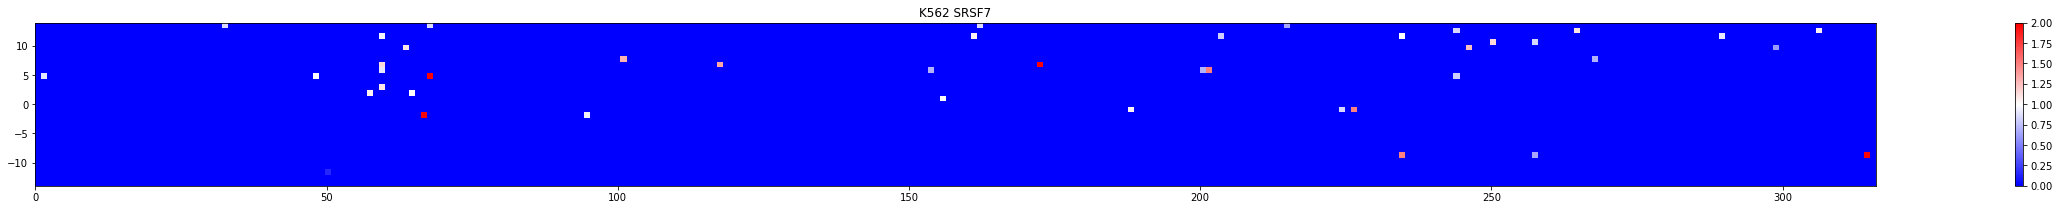

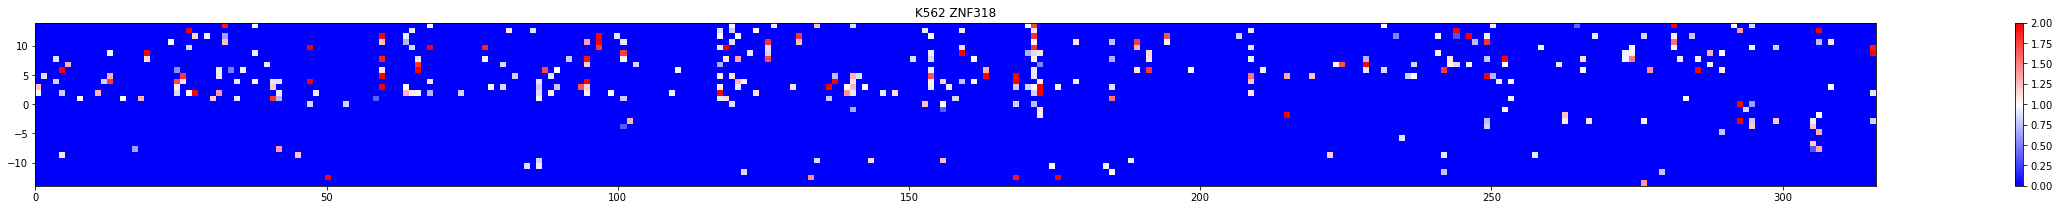

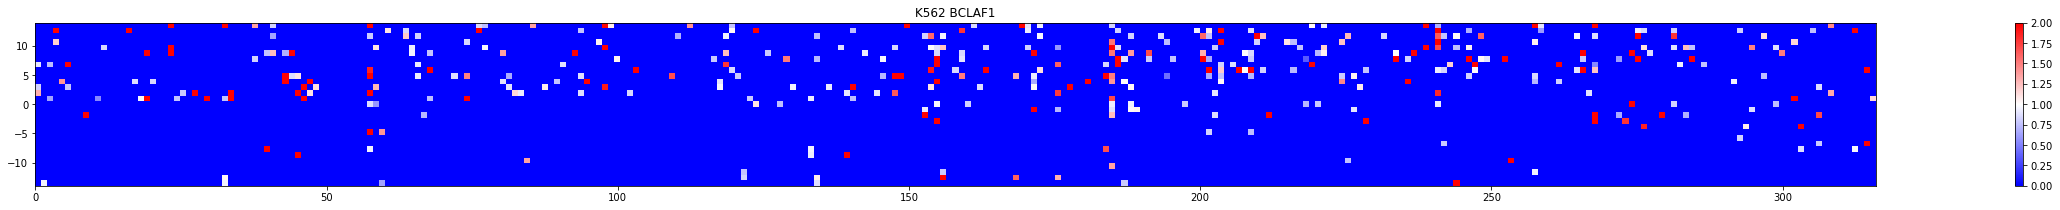

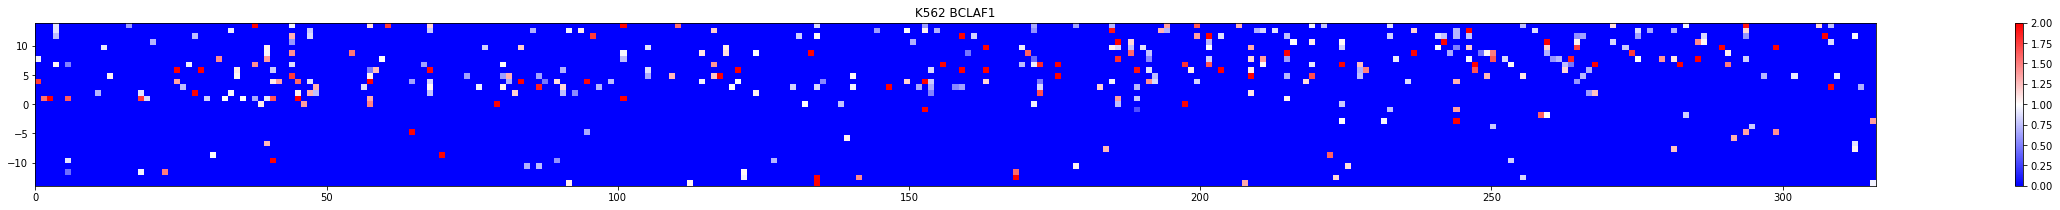

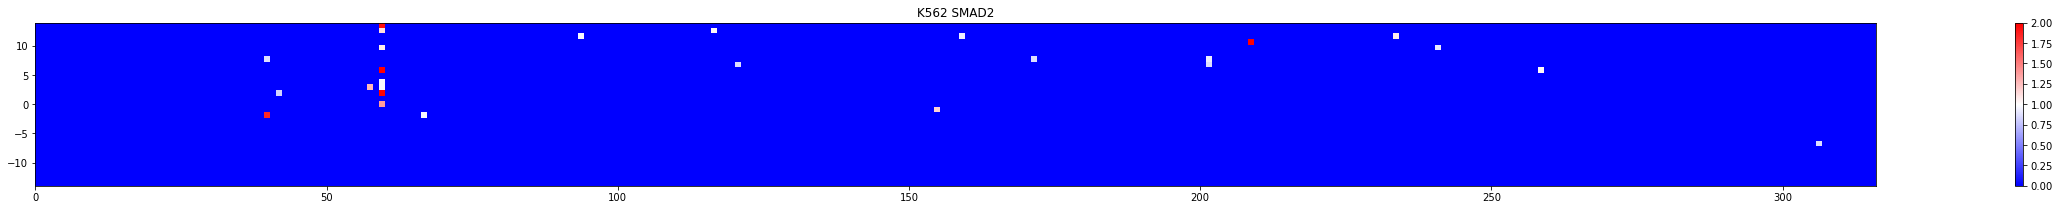

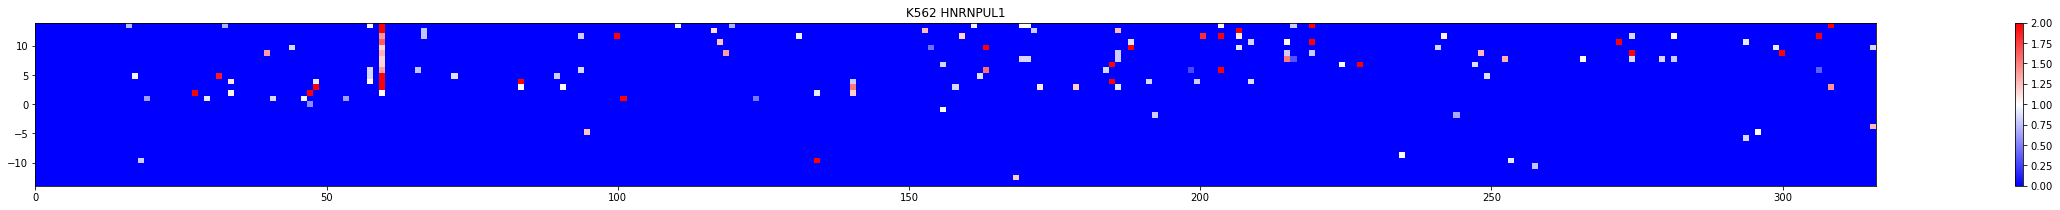

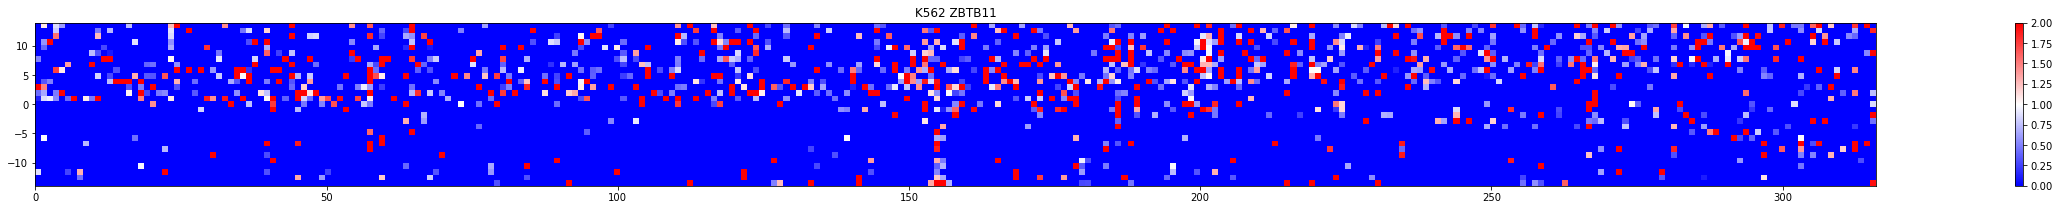

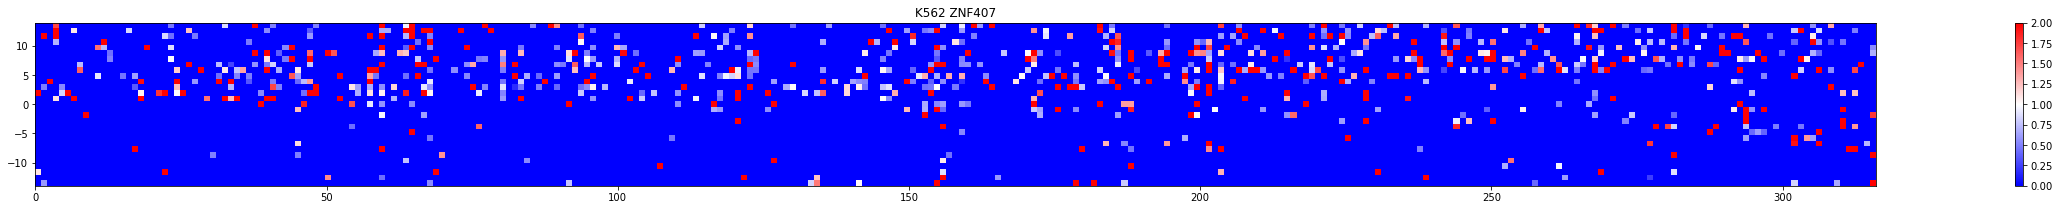

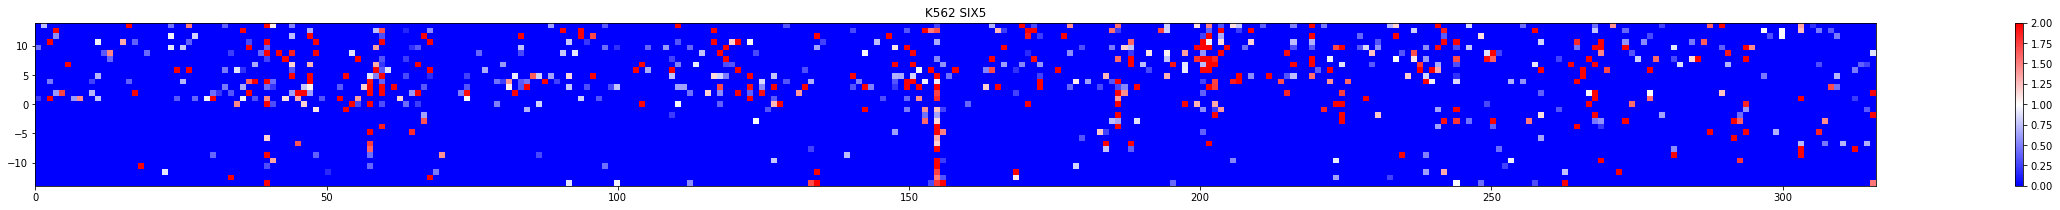

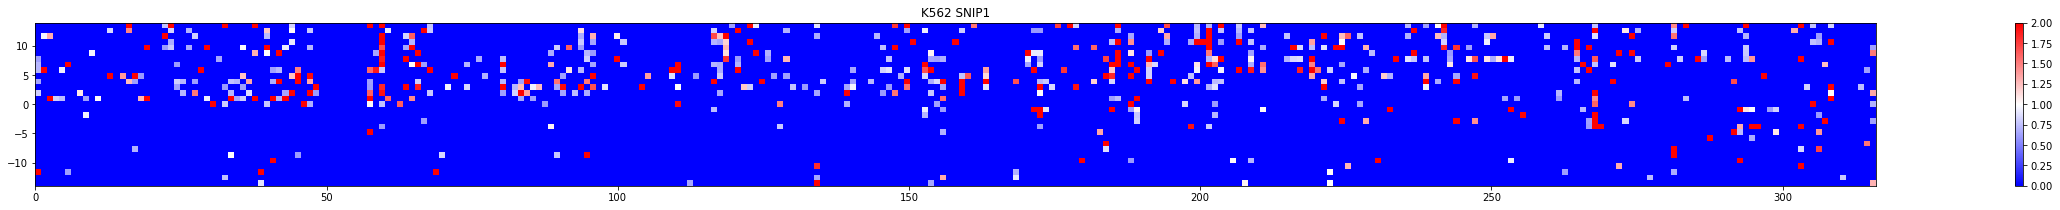

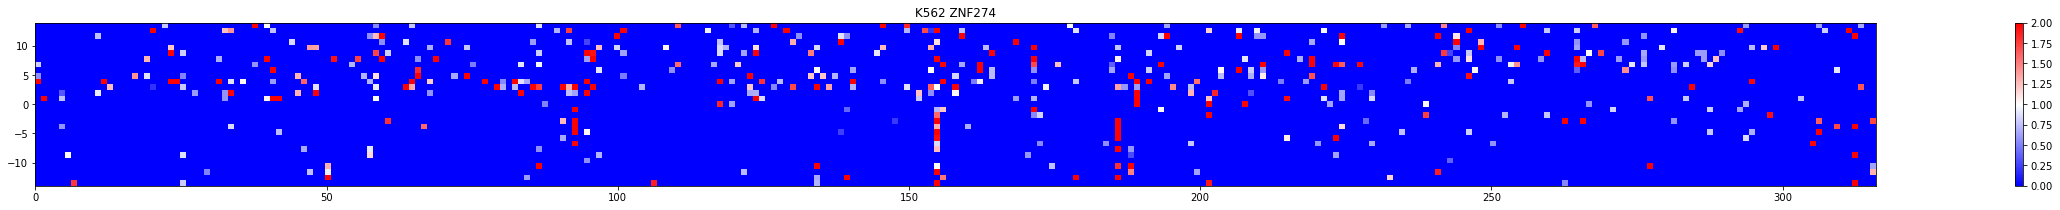

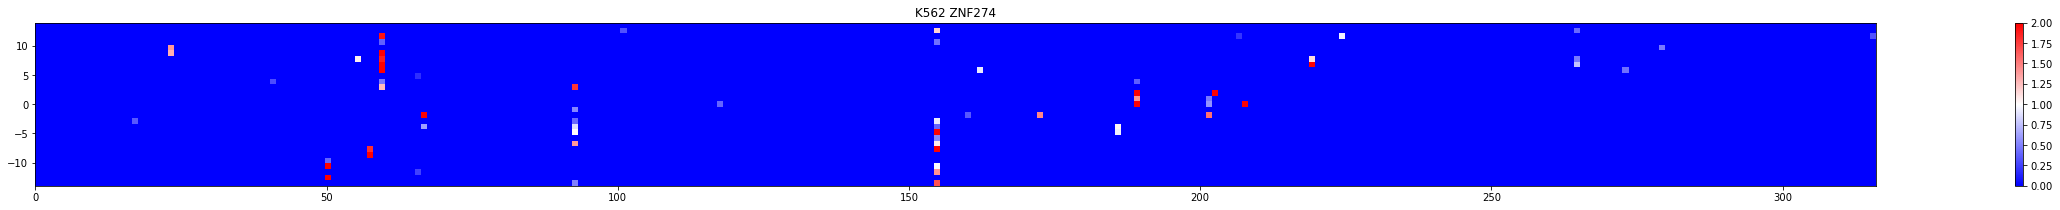

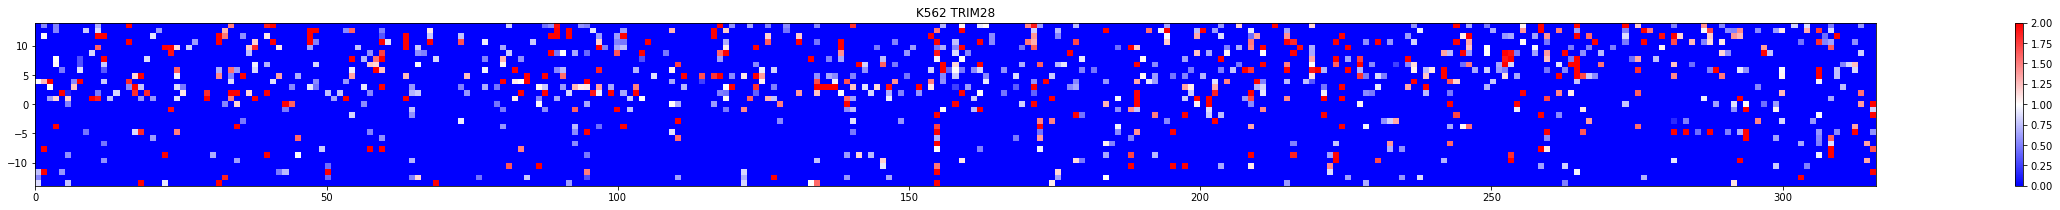

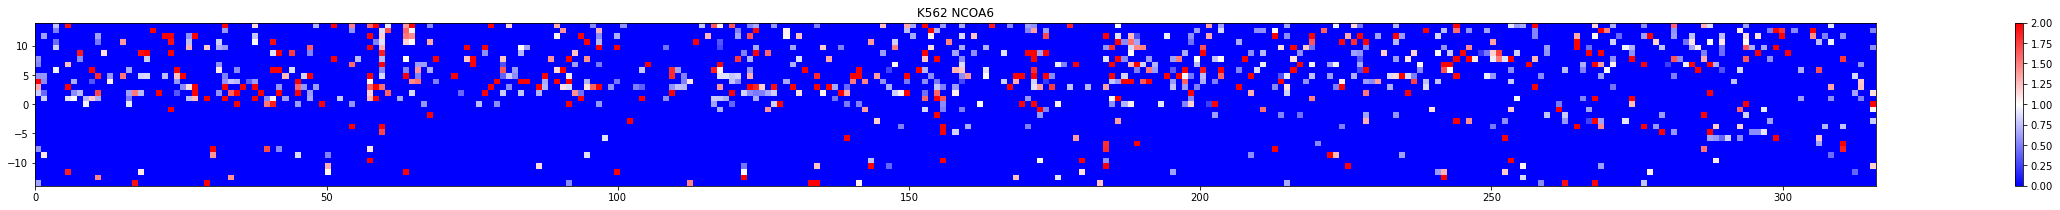

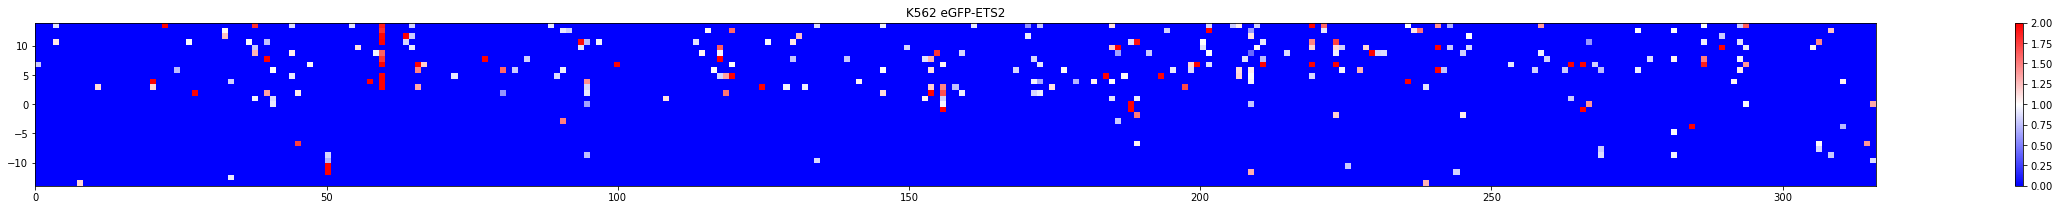

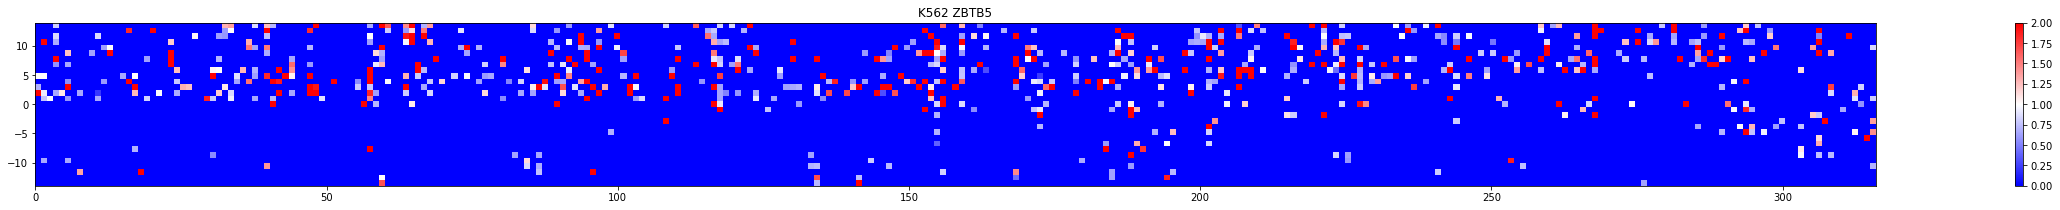

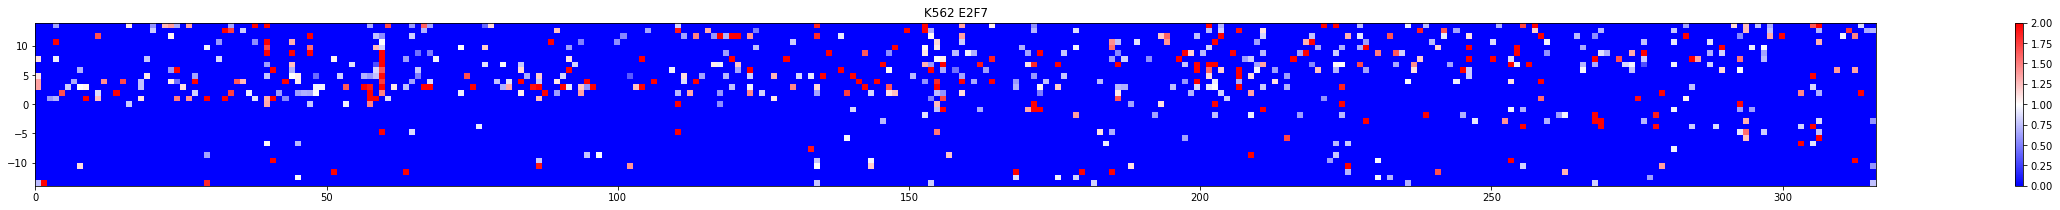

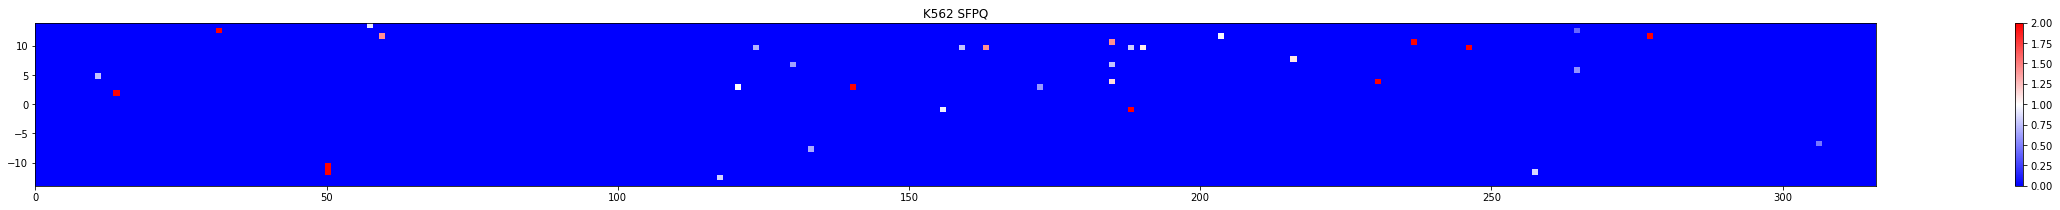

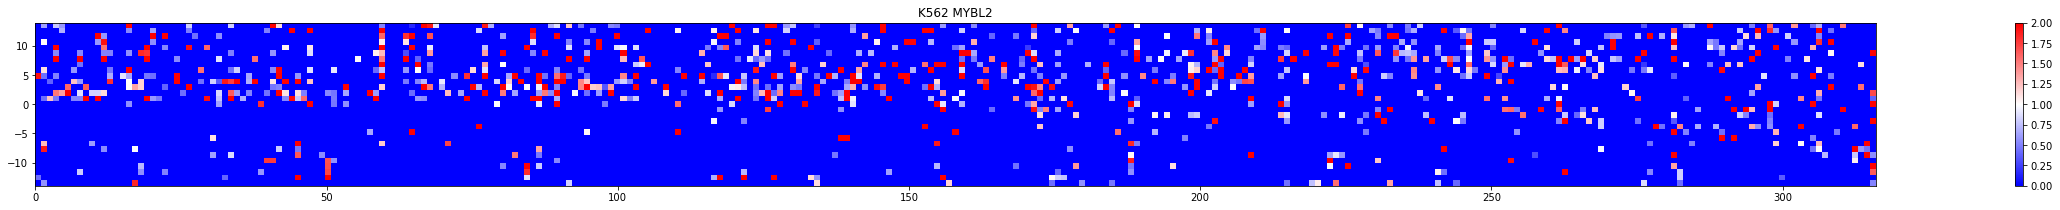

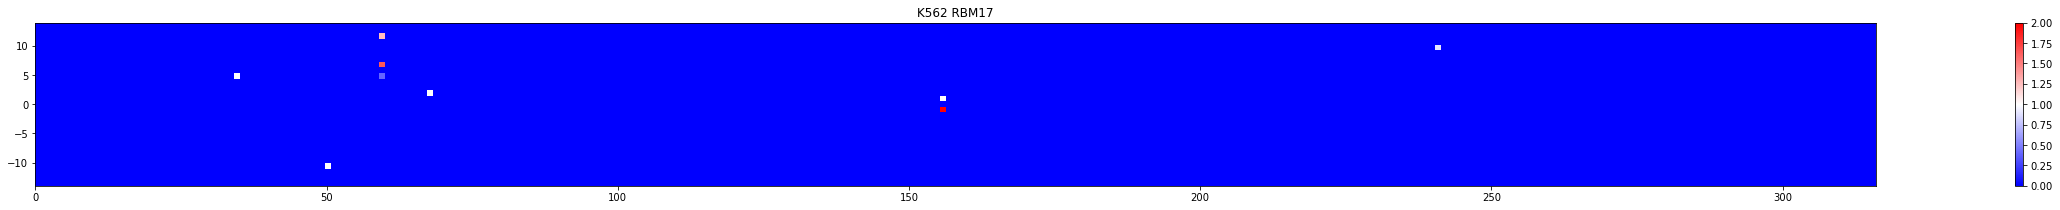

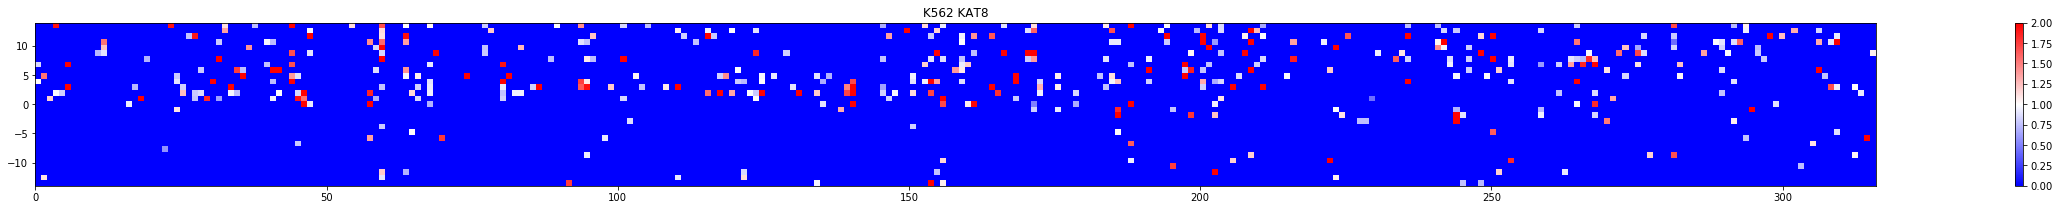

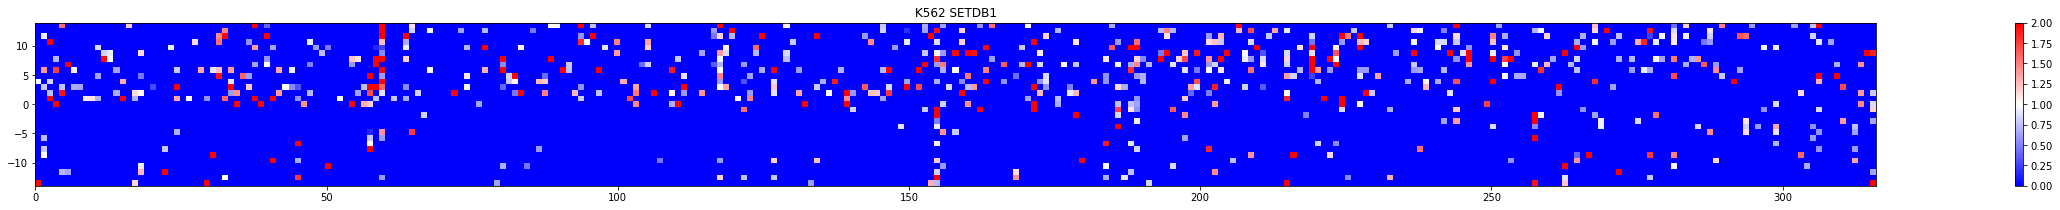

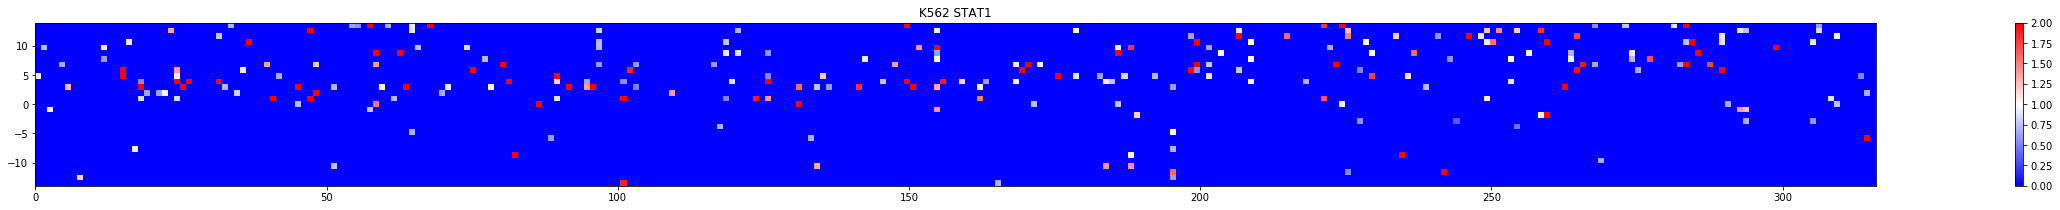

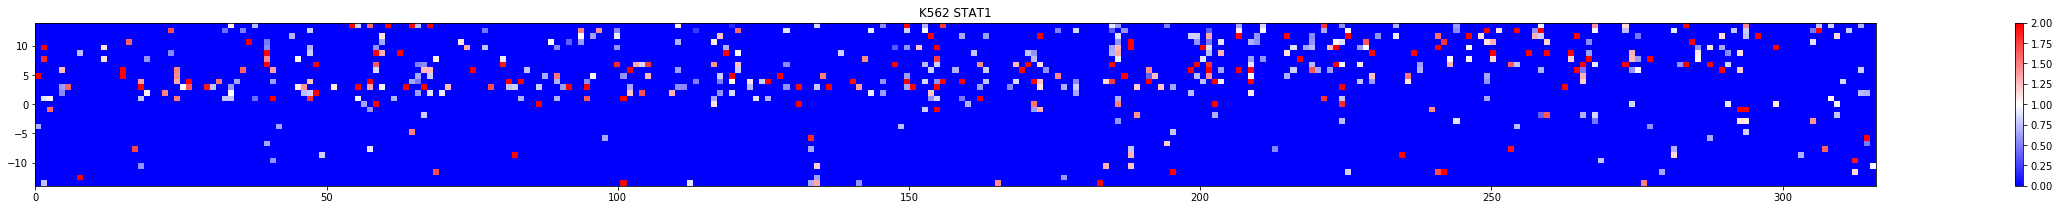

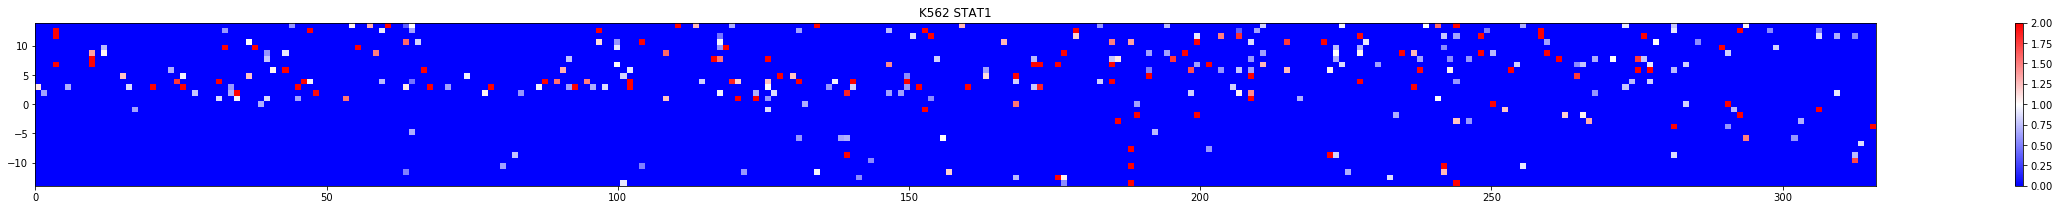

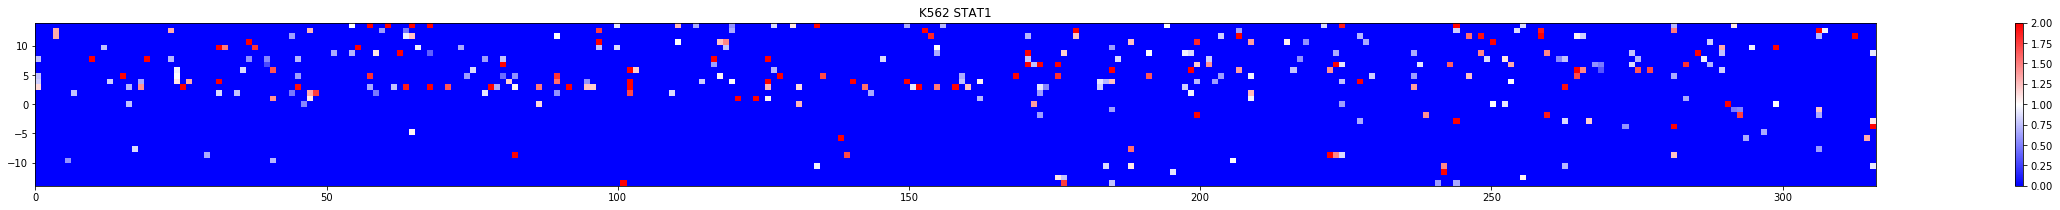

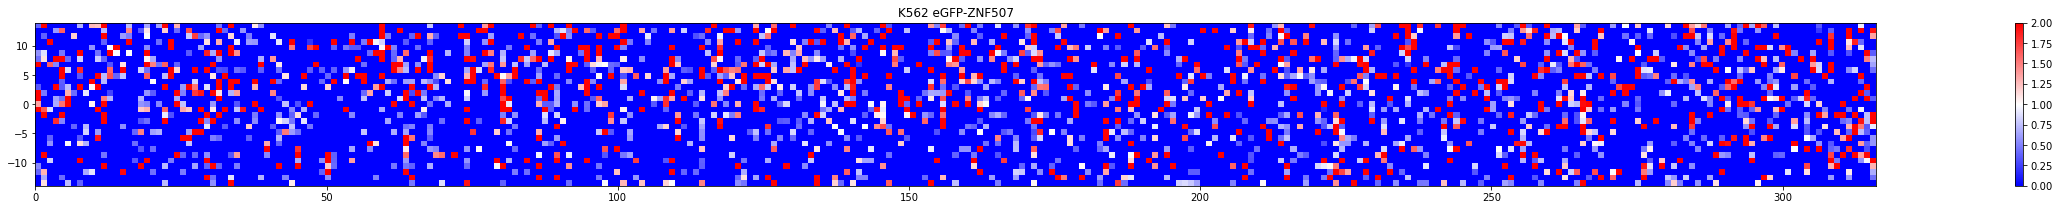

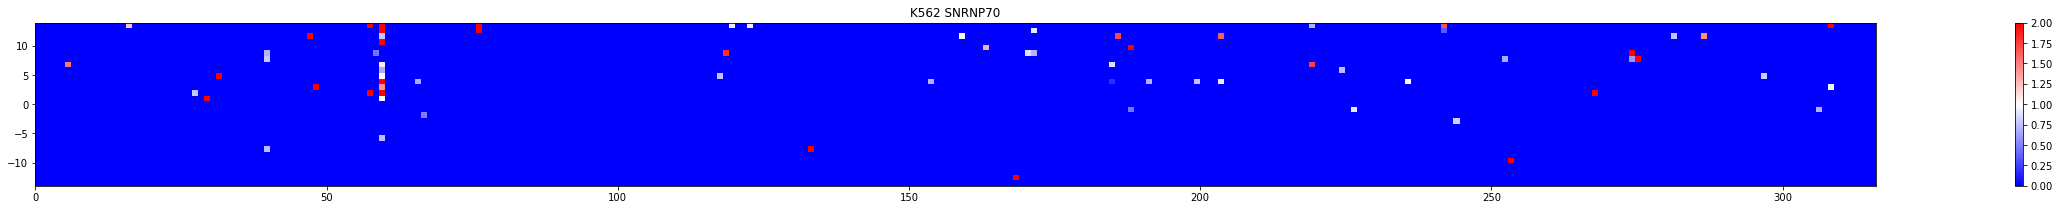

In [231]:
k = 2
loc = get_chips(beds_df, df.iloc[k].cell_line, df.iloc[k].assembly)[kmeans == 4]
some_wins = np.array(all_windows[2])[kmeans == 4]
for i in range(50):
    plt.figure(figsize = (50, 3))
    plt.imshow(some_wins[i].reshape(29, -1), vmin = 0, vmax = 2, cmap = 'bwr', extent = [ 0, windows.shape[0], -14, 14])
    plt.colorbar()
    plt.title(loc.iloc[i].cell_line + " "+ loc.iloc[i].target);


cell_line                                                           K562
assay                                                           ChIP-seq
file_format                                               bed narrowPeak
output_type                                optimal idr thresholded peaks
assembly                                                            hg19
file_status                                                     released
target                                                        eGFP-HDAC8
biosample_treatment                                                 None
lab                                                Kevin White, UChicago
replicate                                                         rep1,2
file_name                                             ENCFF833KXP.bed.gz
file_location          /pollard/data/functional_genomics/encode/K562/...
Name: 5, dtype: object

In [517]:
windows = stack_windows(index_list, mask_signal(results[6][0], 'signalValue', 'E1'), window = 15)

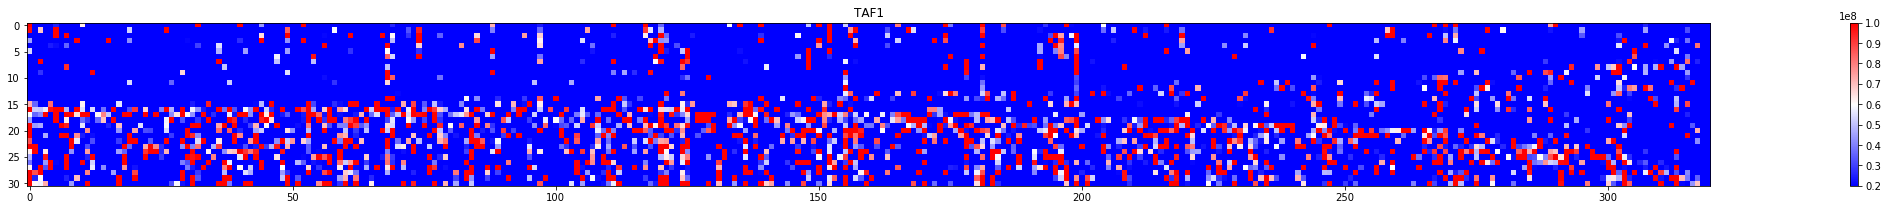

In [518]:
plt.figure(10, figsize = (50, 3))
plt.imshow(windows.T, vmin = 0.2*1e8, vmax = 1*1e8, cmap = 'bwr')
plt.colorbar()
plt.title('TAF1');

In [223]:
def get_blacklist(track):
    mask = track.E1 == track.E1
    values = track[mask].HMM3.values
    transitions = np.where(np.abs(np.diff(values)) > 0)[0]+1
    print(transitions)

In [53]:
get_blacklist(hmm_tracks[6])

[   18    24    30 ... 27572 27588 27589]


In [433]:
def get_transitions(sig, state1, state2):
    '''
        sig: numpy array of a state model
        state1: number of coming from
        state2: number of going to
    '''
    
    target = state2-state1
    diff_sig= np.insert(np.diff(sig), 0, 0, axis = 0)
    p = np.where((diff_sig == target) & (sig == state2))
    return p[0]

In [699]:
#loc_df = r[247]
loc_df = hmm_tracks[3]

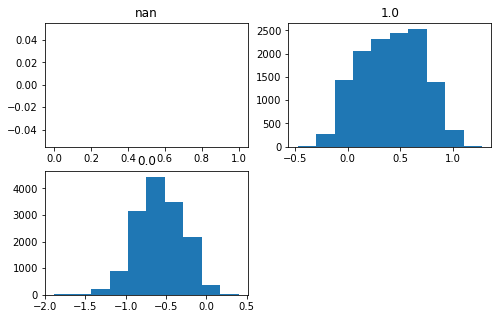

In [719]:
plt.figure(figsize = (8, 5))
for i, state in enumerate(loc_df['HMM2'].unique()):
    plt.subplot(2, 2, i + 1)
    y = loc_df.E1
    plt.title(state)
    plt.hist(y[loc_df['HMM2'] == state].values)

In [734]:
loc_df = r[145]
mask = loc_df.E1 == loc_df.E1
signal = loc_df.binary[mask]

In [715]:
indexes = np.concatenate((get_transitions(signal, 0, 2), get_transitions(signal, 2, 0)))

In [716]:
indexes

array([21411,  1199,  4515, 19641, 20470, 21339])

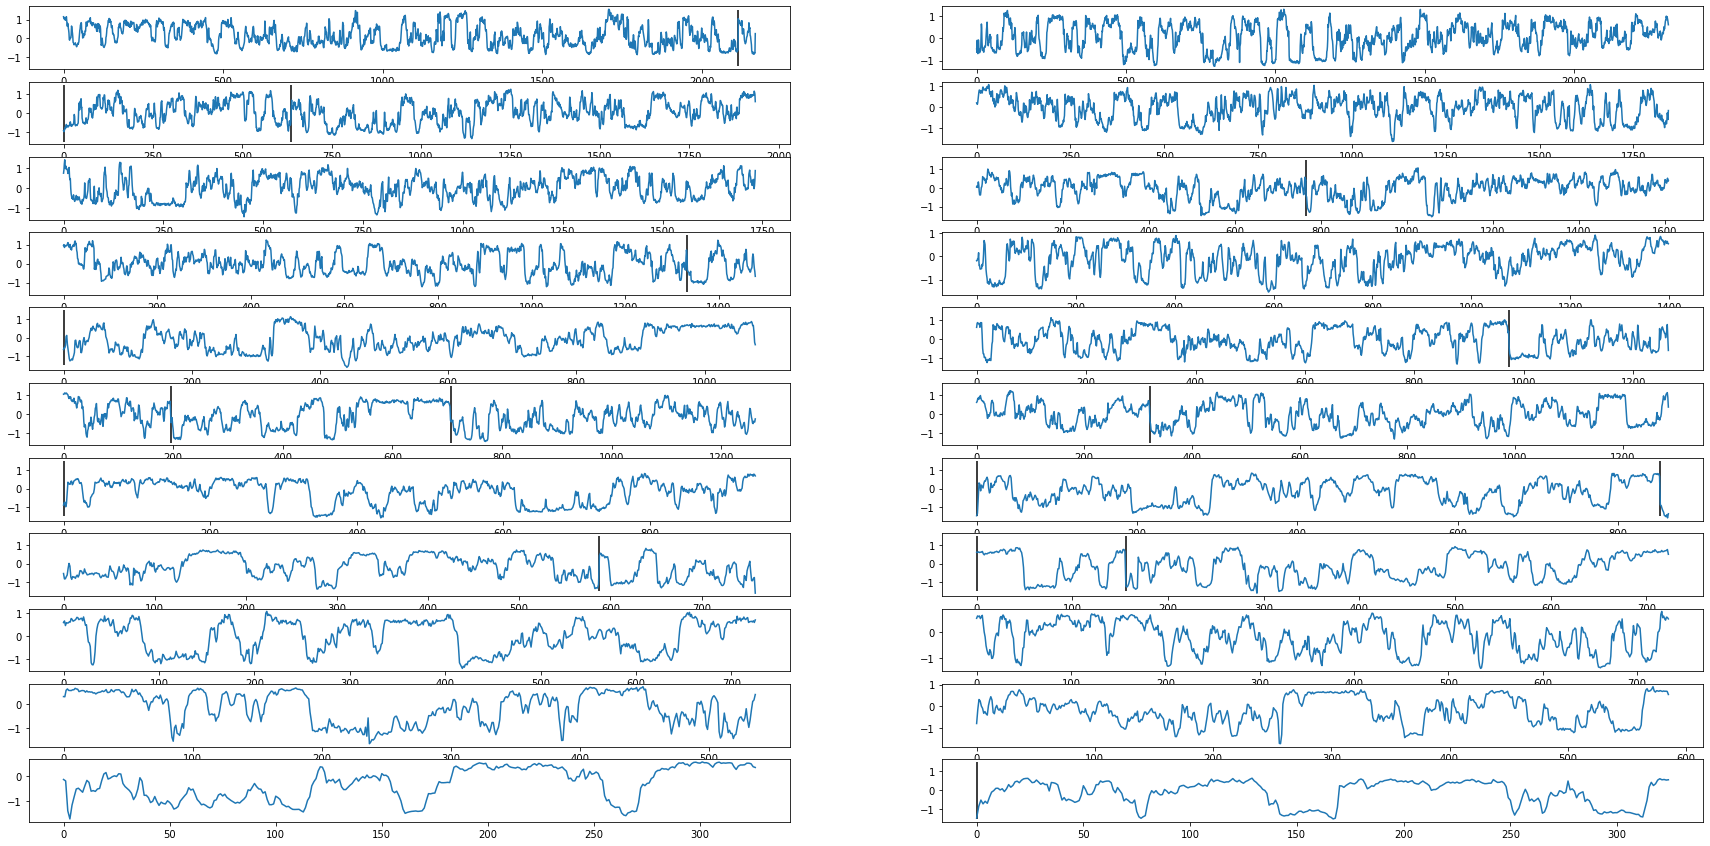

In [703]:
plt.figure(figsize = (30, 15))

L = 0
for i, ch in enumerate(loc_df.chrom.unique()[:-3]):
    
    plt.subplot(11, 2, i+1)
    chrom_df = loc_df[loc_df['chrom']==ch]
    mask = chrom_df.E1==chrom_df.E1
    
    y = chrom_df.E1[mask].values
    
    
    plt.plot(y)
    
    line_mask = np.where( (indexes-L >= 0) & (indexes-L < len(y)) )[0]
    
    plt.vlines(indexes[line_mask]-L, ymin=-1.5, ymax = 1.5)
    
    
    L+= len(y)
    
    

In [569]:
def plot_chroms(track, *signal):
    '''
        Used to plot different biological signals in different chromosomes
        track: it takes in a pandas dataframe of Hi-C data
        signal: takes in a tuple or multiple parameters of the columns to be plotted, it will do so per chromosome
        
        
        By default the signals plotted will only be at points with no NaNs in the E1 column.
    '''
    plt.figure(figsize = (30, 20))
    i = 1
    for ch in track.chrom.unique()[:-3]: #avoids the last three chroms, X, Y and M
        plt.subplot(11, 2, i)
        plt.title(ch)
        P = track[track.chrom == ch]
        mask = ~P['E1'].isna()
        for s in signal:
            E = P[mask][s].values
            if s != 'E1':
                E/= np.nanmax(E) - np.nanmin(E)
                E = 2*E -1
            plt.plot(E)
            plt.margins(0)
        i+=1
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                        wspace=0.35)

1199    -0.293096
4515     0.760534
19641    0.591860
20470    0.476209
21339   -0.196666
Name: E1, dtype: float64

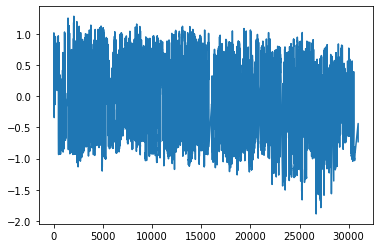

In [570]:
plt.plot(hmm_tracks[6].E1[hmm_tracks[6].E1 == hmm_tracks[6].E1])

In [735]:
indexes = get_transitions(signal, 1, 0)

windows_sig = get_window(indexes, loc_df.signalValue[mask].values,window = 5 )

windows_E1 = get_window(indexes, loc_df.E1[mask].values,window = 5 )

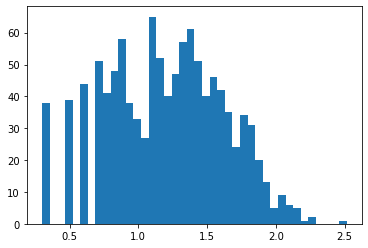

In [736]:
plt.hist(np.log10(np.diff(indexes)), 40);

In [737]:
windows_E1.shape

(688, 11)

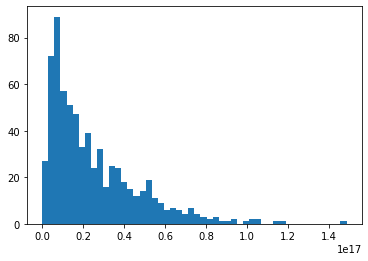

In [738]:
plt.hist(windows_sig[:,1], 50);

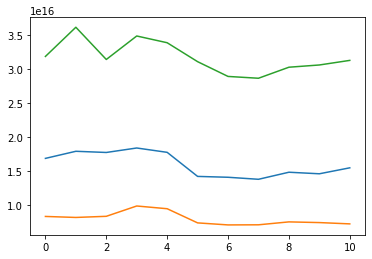

In [739]:
plt.plot(np.median(windows_sig, axis = 0))
plt.plot(np.percentile(windows_sig, 25, axis = 0))
plt.plot(np.percentile(windows_sig, 75, axis = 0))

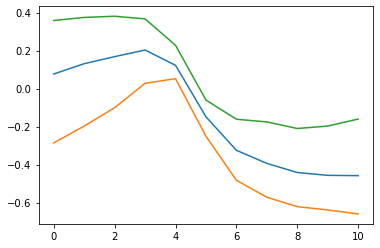

In [740]:

plt.plot(np.median(windows_E1,axis = 0))
plt.plot(np.percentile(windows_E1, 25, axis = 0))
plt.plot(np.percentile(windows_E1, 75, axis = 0))

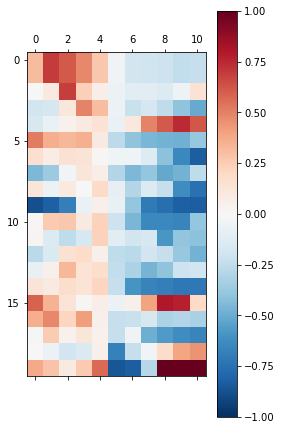

In [741]:
plt.matshow(windows_E1[:20],vmin=-1,vmax=1,cmap='RdBu_r'); plt.colorbar()

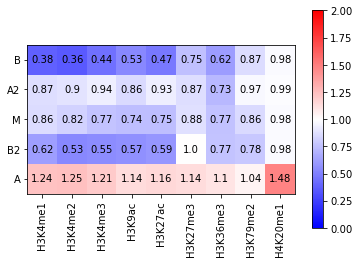

In [497]:
vals = multi_fold(df.iloc[6], hmm_tracks[6], beds_df, 'HMM5_2', *targets)
